In [142]:
options(repr.plot.width=15, repr.plot.height=10)

In [5]:
library(plyr)
library(ggplot2)
library(corpcor)
library(evolqg)
library(tidyverse)
library(cowplot)
library(patchwork)
library(psych)
library(doMC)
registerDoMC(8)

In [6]:
#data_folder = "/Genomics/ayroleslab2/lamaya/bigProject/eQTLcatalog/modularity/matrices"
data_folder = "./"
dir(data_folder)

[1] "__pycache__"                                                                     
 [2] "body_high-block.1.RData"                                                         
 [3] "body_low-block.1.RData"                                                          
 [4] "body_table_wcgna_fdrLevel-1e-05.csv"                                             
 [5] "body_trimmed-block.1.RData"                                                      
 [6] "Control-BodyHead - NetworkStats.ipynb"                                           
 [7] "Correlations between head and body - The SVA trials.ipynb"                       
 [8] "datafile.txt"                                                                    
 [9] "Decoherence for the masses.ipynb"                                                
[10] "export_blocks.py"                                                                
[11] "FETCH_HEAD"                                                                      
[12] "fit_sbm.py"                                                                      
[13] "gene_network_statistics_test.csv"                                                
[14] "Graph Tool - Control-Body-HighQC - Graph Structure .ipynb"                       
[15] "Graph tool network inference.ipynb"                                              
[16] "Graph Tool Small network Resource Paper - Control-BodyHead - Make Networks.ipynb"
[17] "GraphTool-Control-Head-HighQC-NullModels.ipynb"                                  
[18] "GraphTool-ResourcePaper-Control-Body-HighQC.ipynb"                               
[19] "GraphTool-ResourcePaper-Control-Head-HighQC.ipynb"                               
[20] "head_high-block.1.RData"                                                         
[21] "head_low-block.1.RData"                                                          
[22] "head_table_wcgna_fdrLevel-1e-05.csv"                                             
[23] "head_trimmed-block.1.RData"                                                      
[24] "make_network.py"                                                                 
[25] "run_inital_sbm_head.sh"                                                          
[26] "run_initial_sbm_body.sh"                                                         
[27] "run_sbm_body.sh"                                                                 
[28] "run_sbm_head.sh"                                                                 
[29] "test.csv"                                                                        
[30] "trim_networks.py"                                                                
[31] "WGCNA last chance-Copy1.ipynb"                                                   
[32] "WGCNA last chance.ipynb"

In [14]:
expr_list = list(head = read.table(file.path(data_folder, 
                                             "head_table_wcgna_fdrLevel-1e-05.csv"), 
                                   row.names = 1, header = TRUE, sep = ","),
                 body = read.table(file.path(data_folder, 
                                             "body_table_wcgna_fdrLevel-1e-05.csv"), 
                                   row.names = 1, header = TRUE, sep = ","))

In [15]:
expr_list["head"]

$head
       FBgn0031081 FBgn0052350 FBgn0024733 FBgn0040372 FBgn0023534 FBgn0023537
106_B7    5.060509    4.705684    12.41653    3.760163    3.591924    7.611656
106_C6    5.297734    3.221103    12.21243    4.384999    3.944236    7.215610
106_C8    5.499218    3.077922    12.00066    3.878972    4.542412    7.675215
106_A2    5.144081    3.187525    11.50413    4.137904    4.274401    7.459486
106_G4    4.608946    4.985678    11.61164    3.705962    4.066724    6.956967
106_G5    4.719655    3.181369    11.58397    4.184548    4.203785    7.450771
106_G6    5.151327    3.338430    11.88809    3.772823    3.698595    7.946483
106_H2    4.964323    3.039508    11.22263    3.936636    4.873807    7.096660
106_A7    5.398075    3.082650    11.90801    3.990537    4.482859    7.724232
108_A4    5.221524    3.830418    11.88958    4.101013    3.876305    7.067191
108_A5    4.923229    3.393329    11.96998    3.736647    3.644584    7.449071
108_B3    4.780408    4.602936    11.96459    4.068554    2.899846    7.923690
108_B5    5.210400    4.284795    11.54231    3.667881    5.346247    7.284007
108_C1    5.029421    3.520669    11.35598    3.507016    4.277852    7.293017
108_C3    5.159303    4.142065    11.52337    3.927465    4.535369    7.506113
108_C5    5.023805    2.756475    11.99050    3.538884    4.699203    7.332227
108_D3    4.886973    4.067534    11.93716    3.535403    4.965281    7.617076
108_D4    5.506343    3.897361    11.72254    3.968475    3.162923    7.531791
108_E3    5.059302    2.685360    12.03199    4.002116    3.633235    7.325601
108_F2    5.433909    2.997927    11.71589    3.896887    3.193760    7.597179
       FBgn0000108 FBgn0025640 FBgn0003575 FBgn0025634 FBgn0025638 FBgn0040383
106_B7    8.750688    5.015808    4.307134    3.562829    6.690020    5.303784
106_C6    9.191008    5.290460    4.140848    3.746981    6.701968    4.917889
106_C8    9.572163    4.927570    3.967215    3.738268    6.310234    5.191886
106_A2    9.281683    5.175146    4.021908    3.874211    6.866590    3.975691
106_G4    9.231659    5.675135    5.173601    3.027501    7.109986    3.370683
106_G5    9.193487    4.917224    3.316032    3.012837    5.087476    5.173221
106_G6    9.275710    5.870250    4.134280    3.768864    6.252175    5.259302
106_H2    9.606502    4.484359    3.681505    3.488001    6.182576    5.084846
106_A7    9.227061    5.648304    4.260129    3.478390    6.040608    5.697119
108_A4    9.475916    5.240944    4.933187    2.889717    6.167497    4.071835
108_A5    9.399912    4.908104    4.574495    4.397310    6.137269    4.794895
108_B3    8.849855    5.527627    4.223454    3.451751    6.766914    5.374178
108_B5    9.503672    4.381767    4.246445    2.004963    6.366349    4.997302
108_C1    9.234280    5.818138    3.613064    3.767430    6.480098    5.103057
108_C3    9.428383    4.633433    3.916980    3.727266    6.423241    4.552557
108_C5    9.008067    5.104391    4.383374    4.094044    6.891449    4.184880
108_D3    9.293952    4.895428    3.705635    3.773596    6.673583    4.947658
108_D4    9.520599    4.941338    4.400141    3.082051    6.292689    4.920598
108_E3    9.234050    5.169265    4.335587    4.730148    5.580908    4.592651
108_F2    9.100064    5.232921    4.029543    3.491708    6.304911    5.304875
       FBgn0040382 FBgn0025621 FBgn0015799 FBgn0015288 FBgn0002579 FBgn0026879
106_B7    8.388485    4.549518    4.210470    5.505441    12.16071    7.237324
106_C6    8.598838    3.262112    4.375173    5.365332    12.02075    6.808358
106_C8    8.713074    3.932314    3.979912    6.184494    11.84769    7.141478
106_A2    8.719287    4.293154    4.096272    5.839699    11.75178    6.805524
106_G4    8.769353    4.077485    3.823398    5.288730    11.76222    7.019613
106_G5    8.529199    3.887602    4.491629    5.392669    11.50560    6.703942
106_G6    8.839866    3.210421    3.840341    5.597725    11.79820    6.905873
106_H2    8.987902    2.755319    3.771777  

In [16]:
if(!require(WGCNA)){BiocManager::install("WGCNA"); library(WGCNA)}
if(!require(doMC)){install.packages("doMC"); library(doMC)}   
if(!require(tictoc)){install.packages("tictoc"); library(tictoc)}   
library(foreach)
registerDoMC(8)

In [119]:
soft_thresh = llply(expr_list, 
                    pickSoftThreshold, corFnc = "bicor", verbose = 5,
                    networkType = "signed", .parallel = TRUE)

In [120]:
blockWise_power2_spearman = llply(names(expr_list),
                  function(x) {
                      blockwiseModules(expr_list[[x]], 
                                        power = 1,
                                        TOMType = "signed", minModuleSize = 10,
                                        reassignThreshold = 0, mergeCutHeight = 0.25,
                                        numericLabels = TRUE, pamRespectsDendro = FALSE,
                                        maxBlockSize = 10000,
                                        saveTOMs = TRUE,
                                        saveTOMFileBase = x,  corType = "bicor",
                                        verbose = 3)}, .parallel = TRUE)

In [121]:
names(blockWise_power2_spearman) = names(expr_list)

In [122]:
llply(blockWise_power2_spearman[c("body", "head")], function(x) table(x$colors))

$body

   0    1    2    3    4    5    6 
 980 2010  199  157   25   19   17 

$head

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1640  600  564  243  222  221  190  152  140  106  105   97   85   78   75   63 
  16   17   18   19   20   21   22   23   24   25   26 
  59   43   30   29   28   25   24   19   19   19   17 


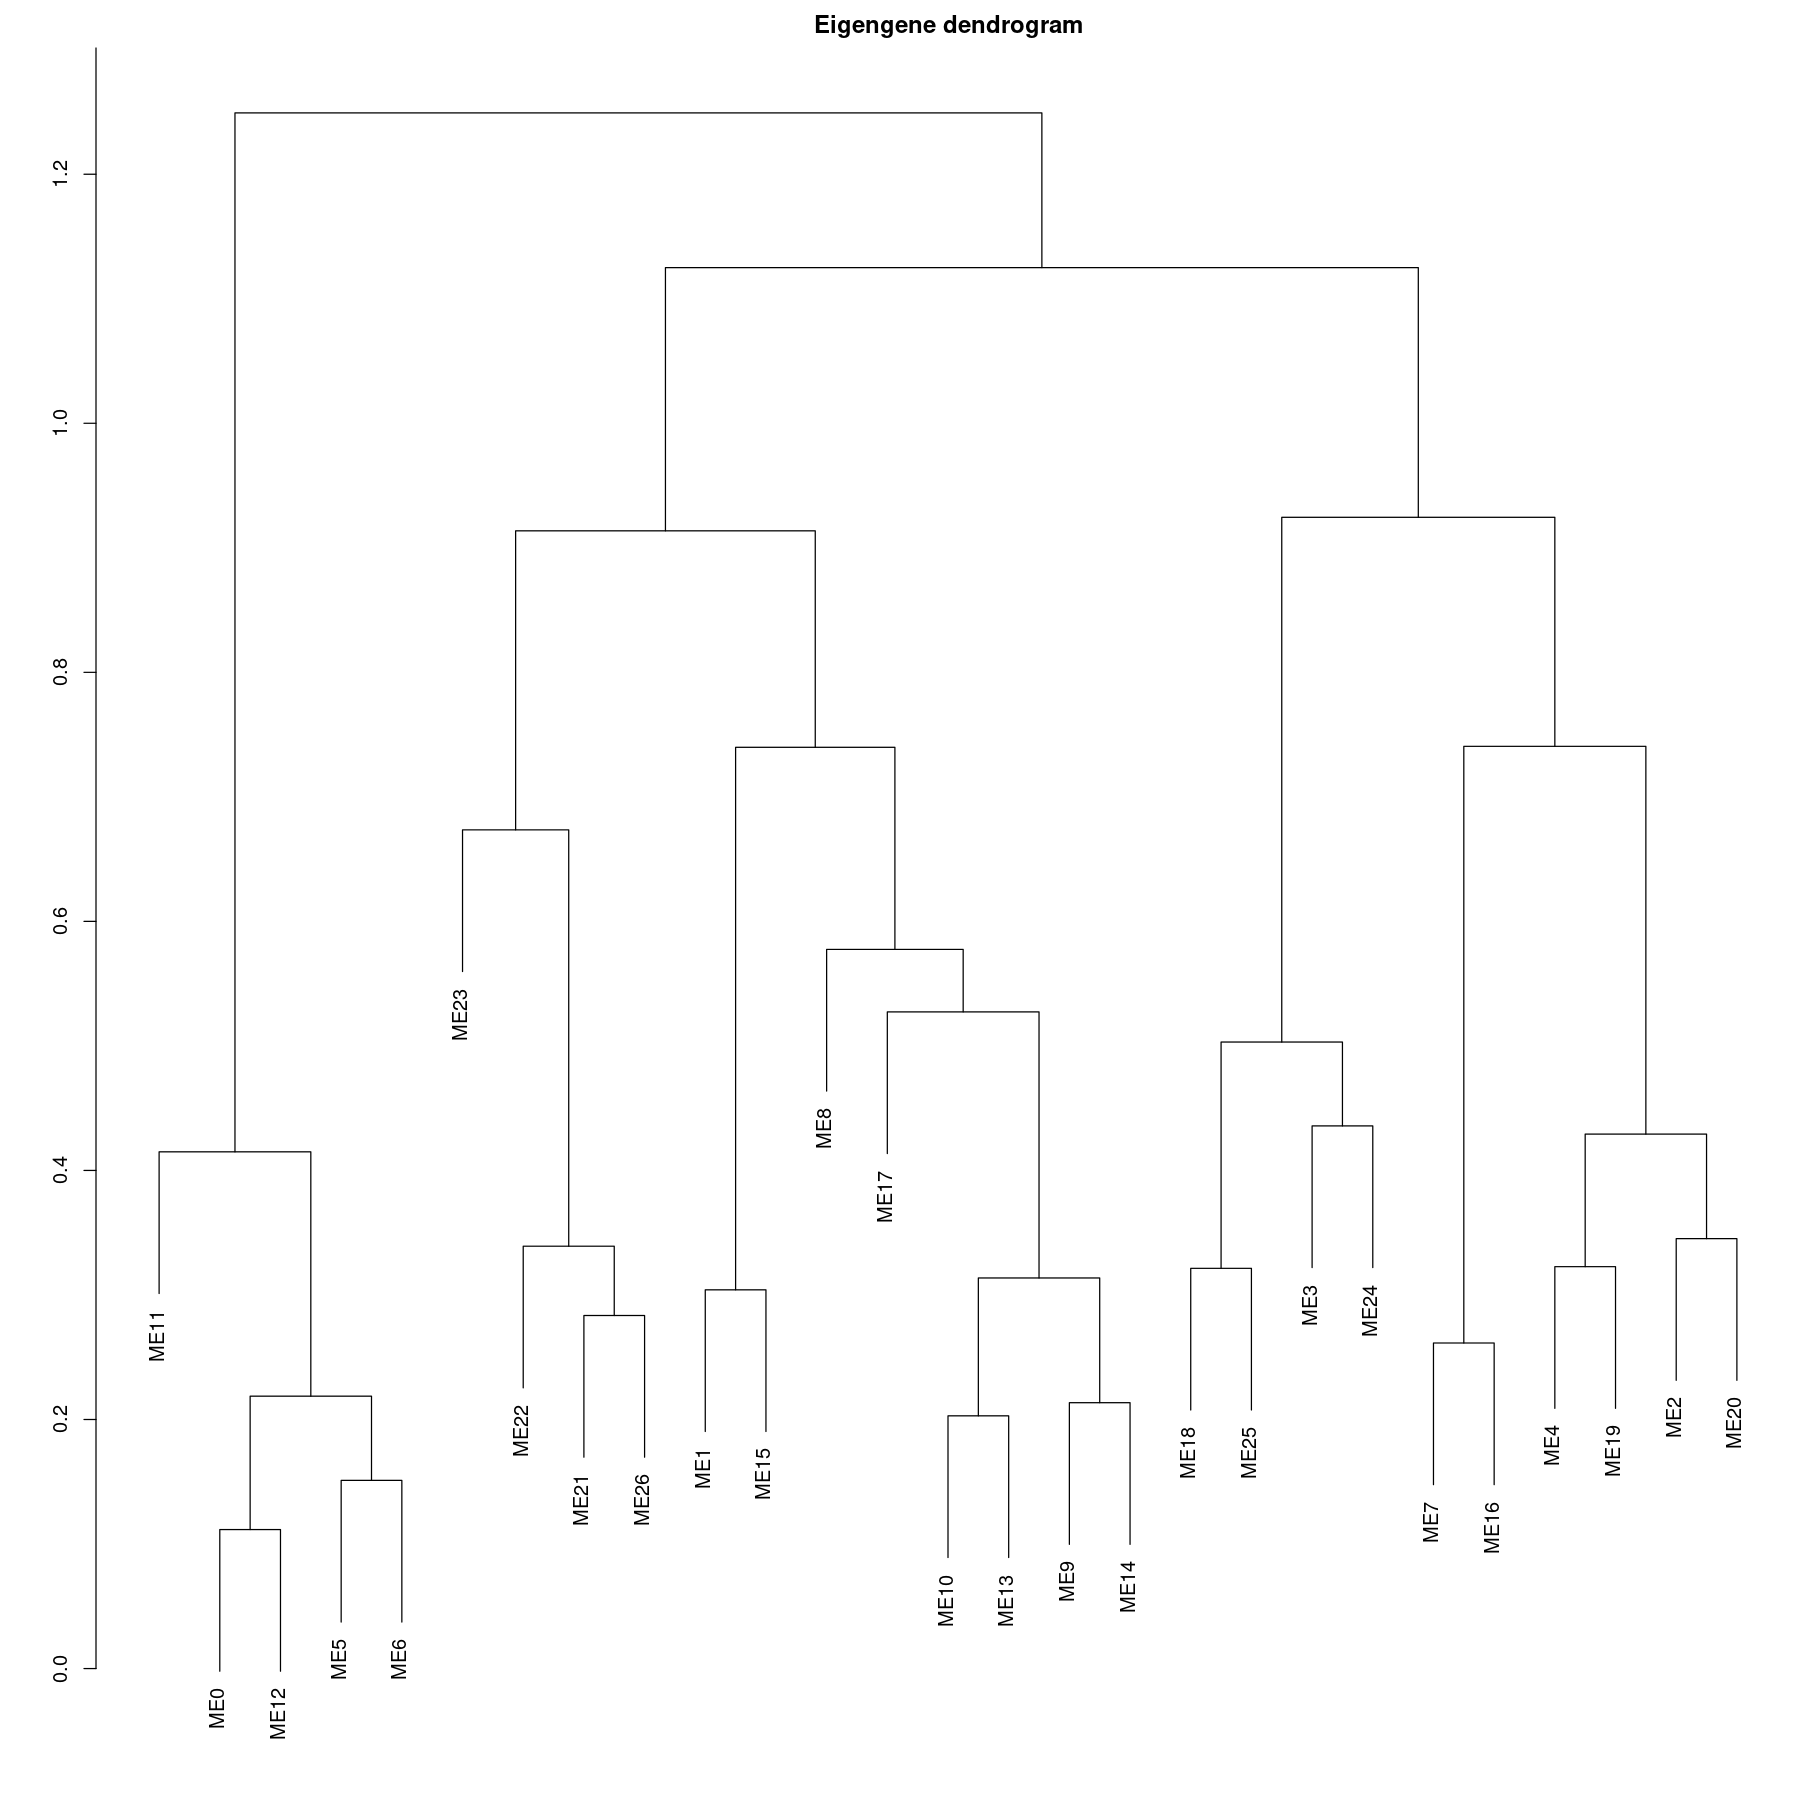

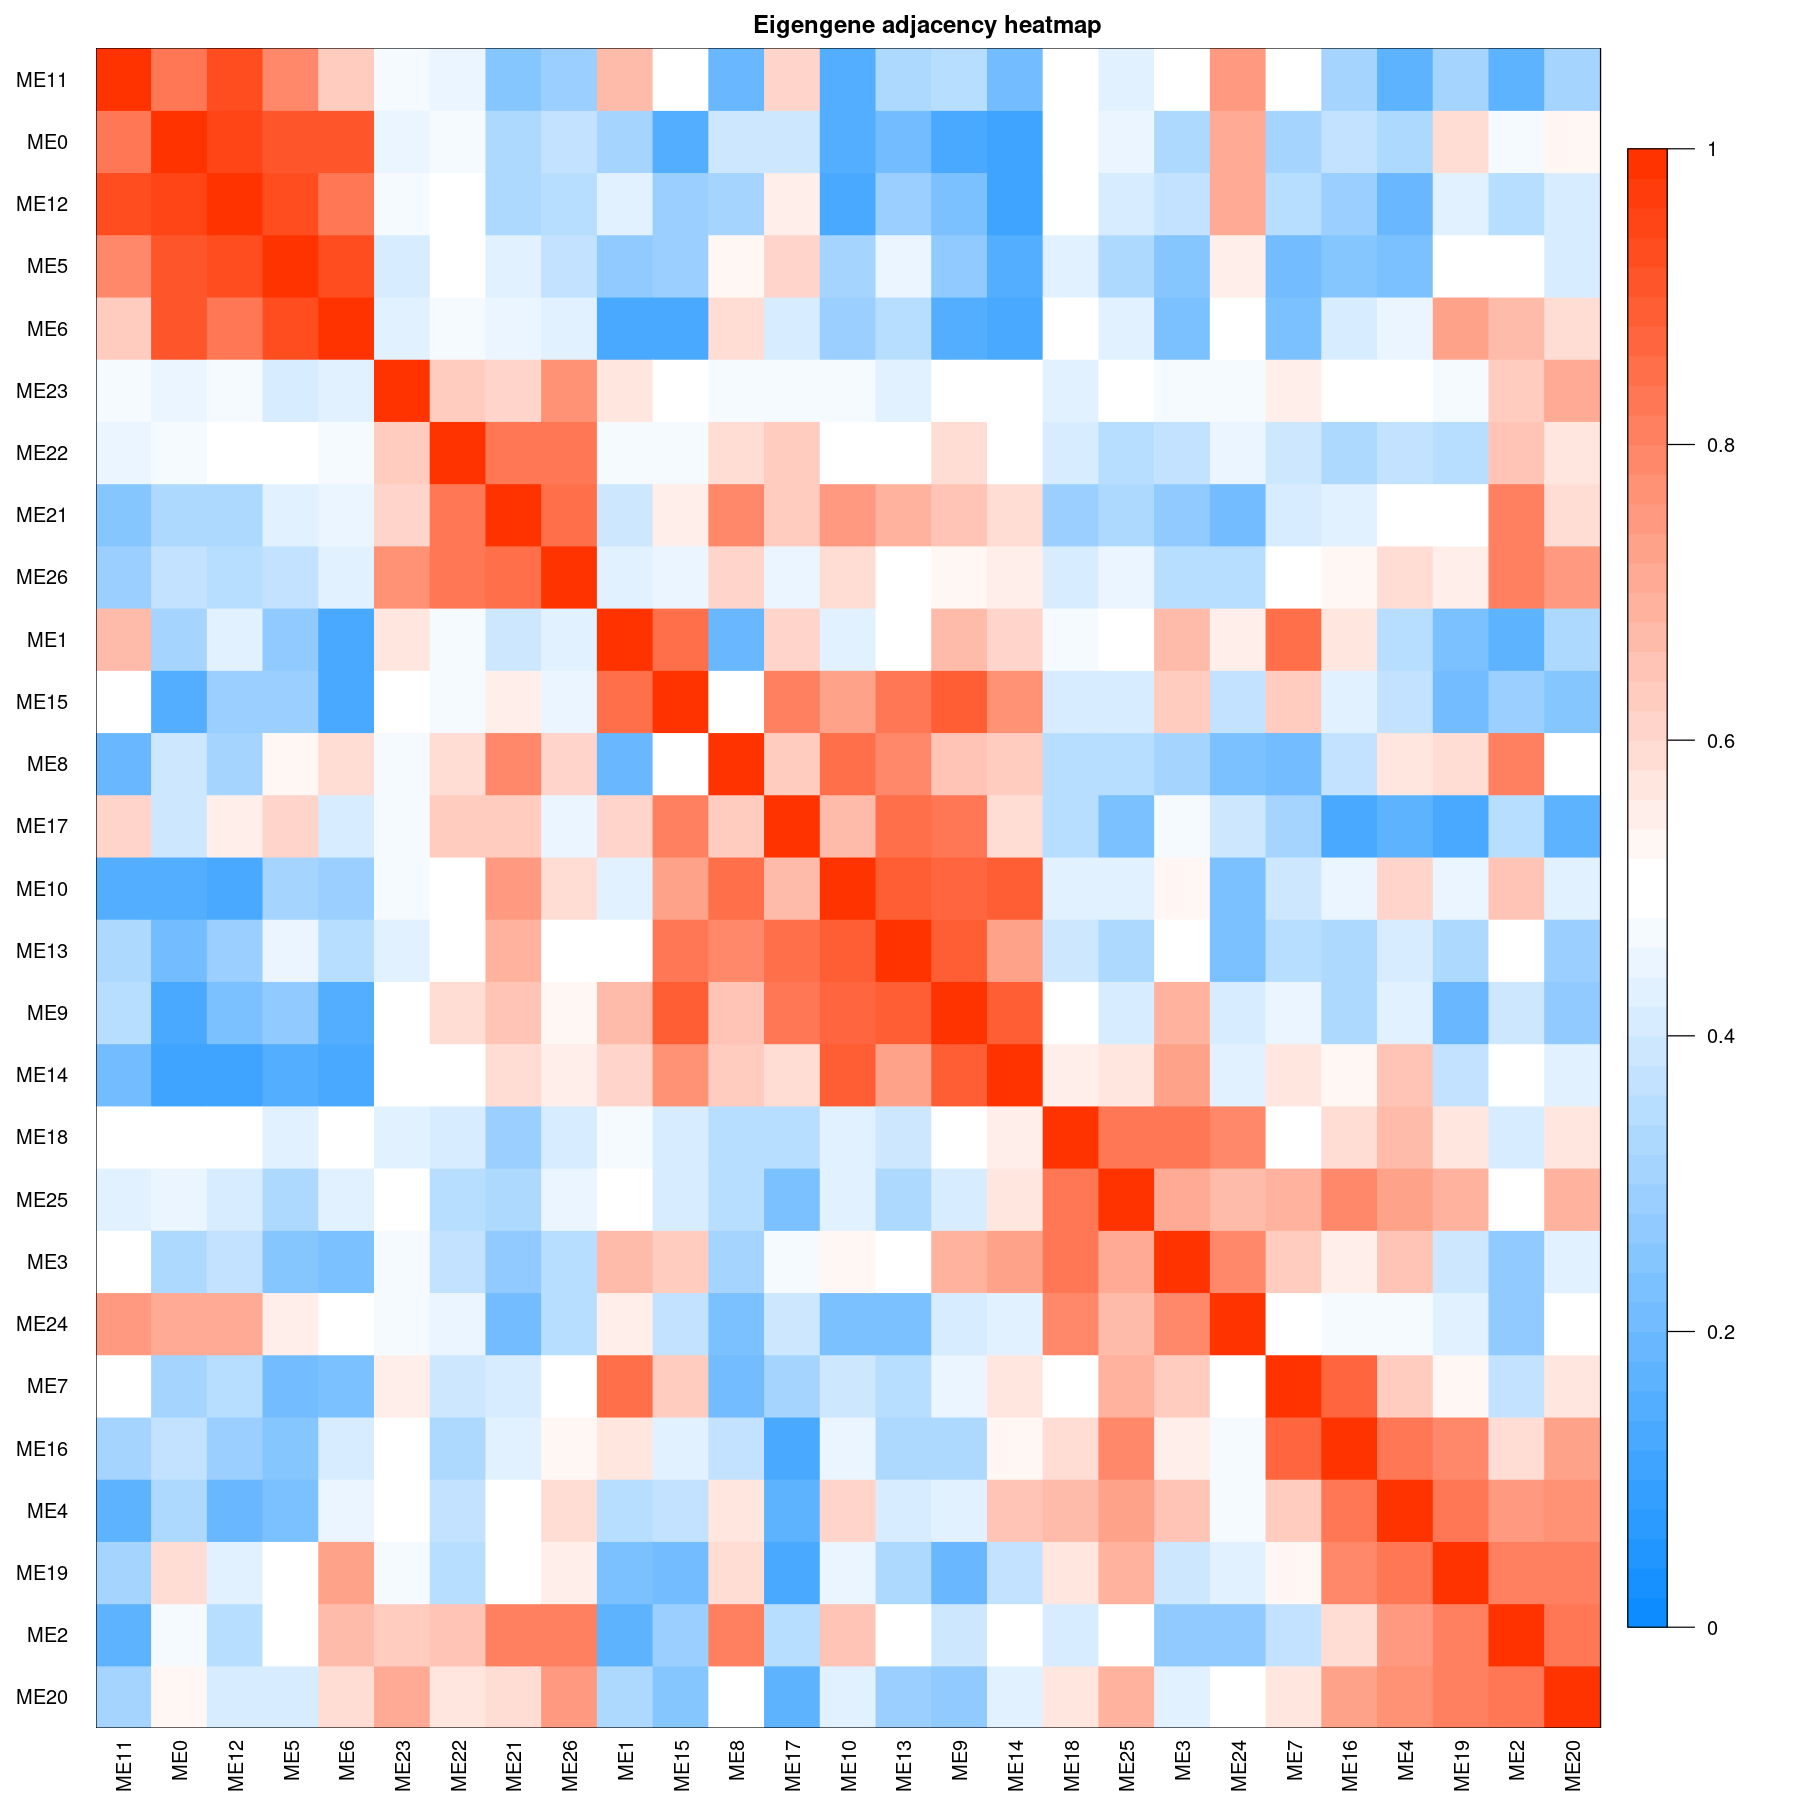

In [123]:
datExpr = expr_list$head
nGenes = ncol(datExpr)
nSamples = nrow(datExpr)

moduleColors = blockWise_power2_spearman$head$colors

# Recalculate module eigengenes
MEs = moduleEigengenes(datExpr, moduleColors)$eigengenes
# Add the weight to existing module eigengenes
MET = orderMEs(MEs)
# Plot the relationships among the eigengenes and the trait
#sizeGrWindow(5,7.5);
#par(cex = 0.9)

par(cex = 1.0)
plotEigengeneNetworks(MET, "Eigengene dendrogram", marDendro = c(0,4,2,0),
plotHeatmaps = FALSE)
# Plot the heatmap matrix (note: this plot will overwrite the dendrogram plot)
par(cex = 1.0)
plotEigengeneNetworks(MET, "Eigengene adjacency heatmap", marHeatmap = c(3,4,2,2),
plotDendrograms = FALSE, xLabelsAngle = 90)

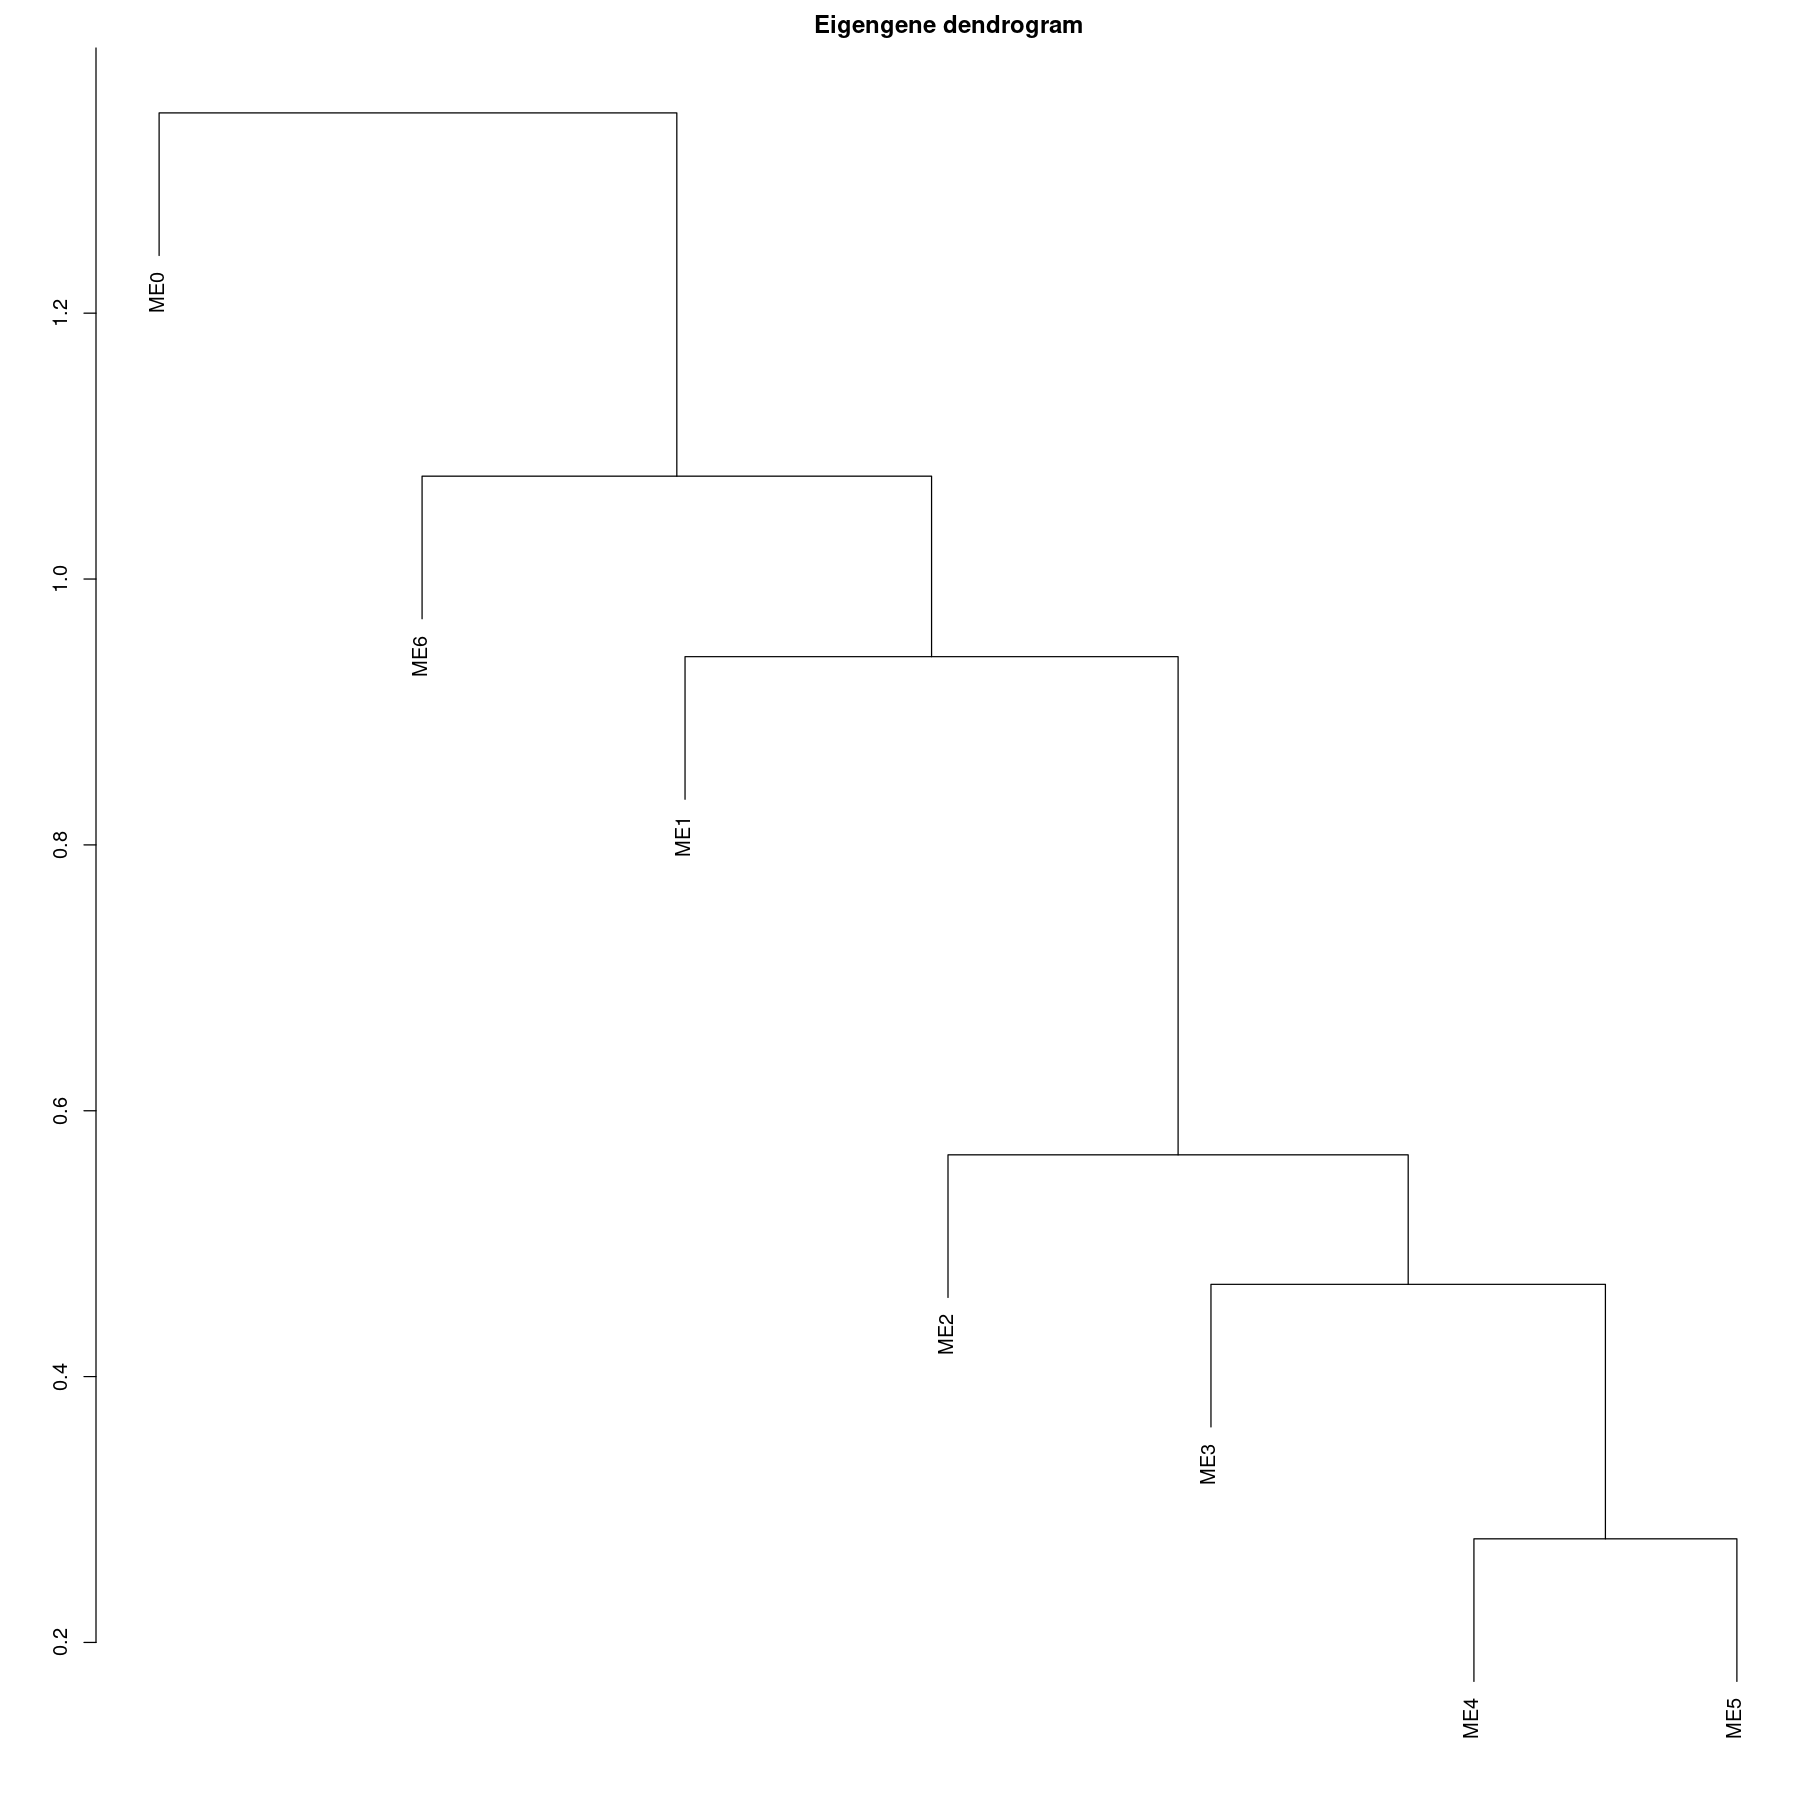

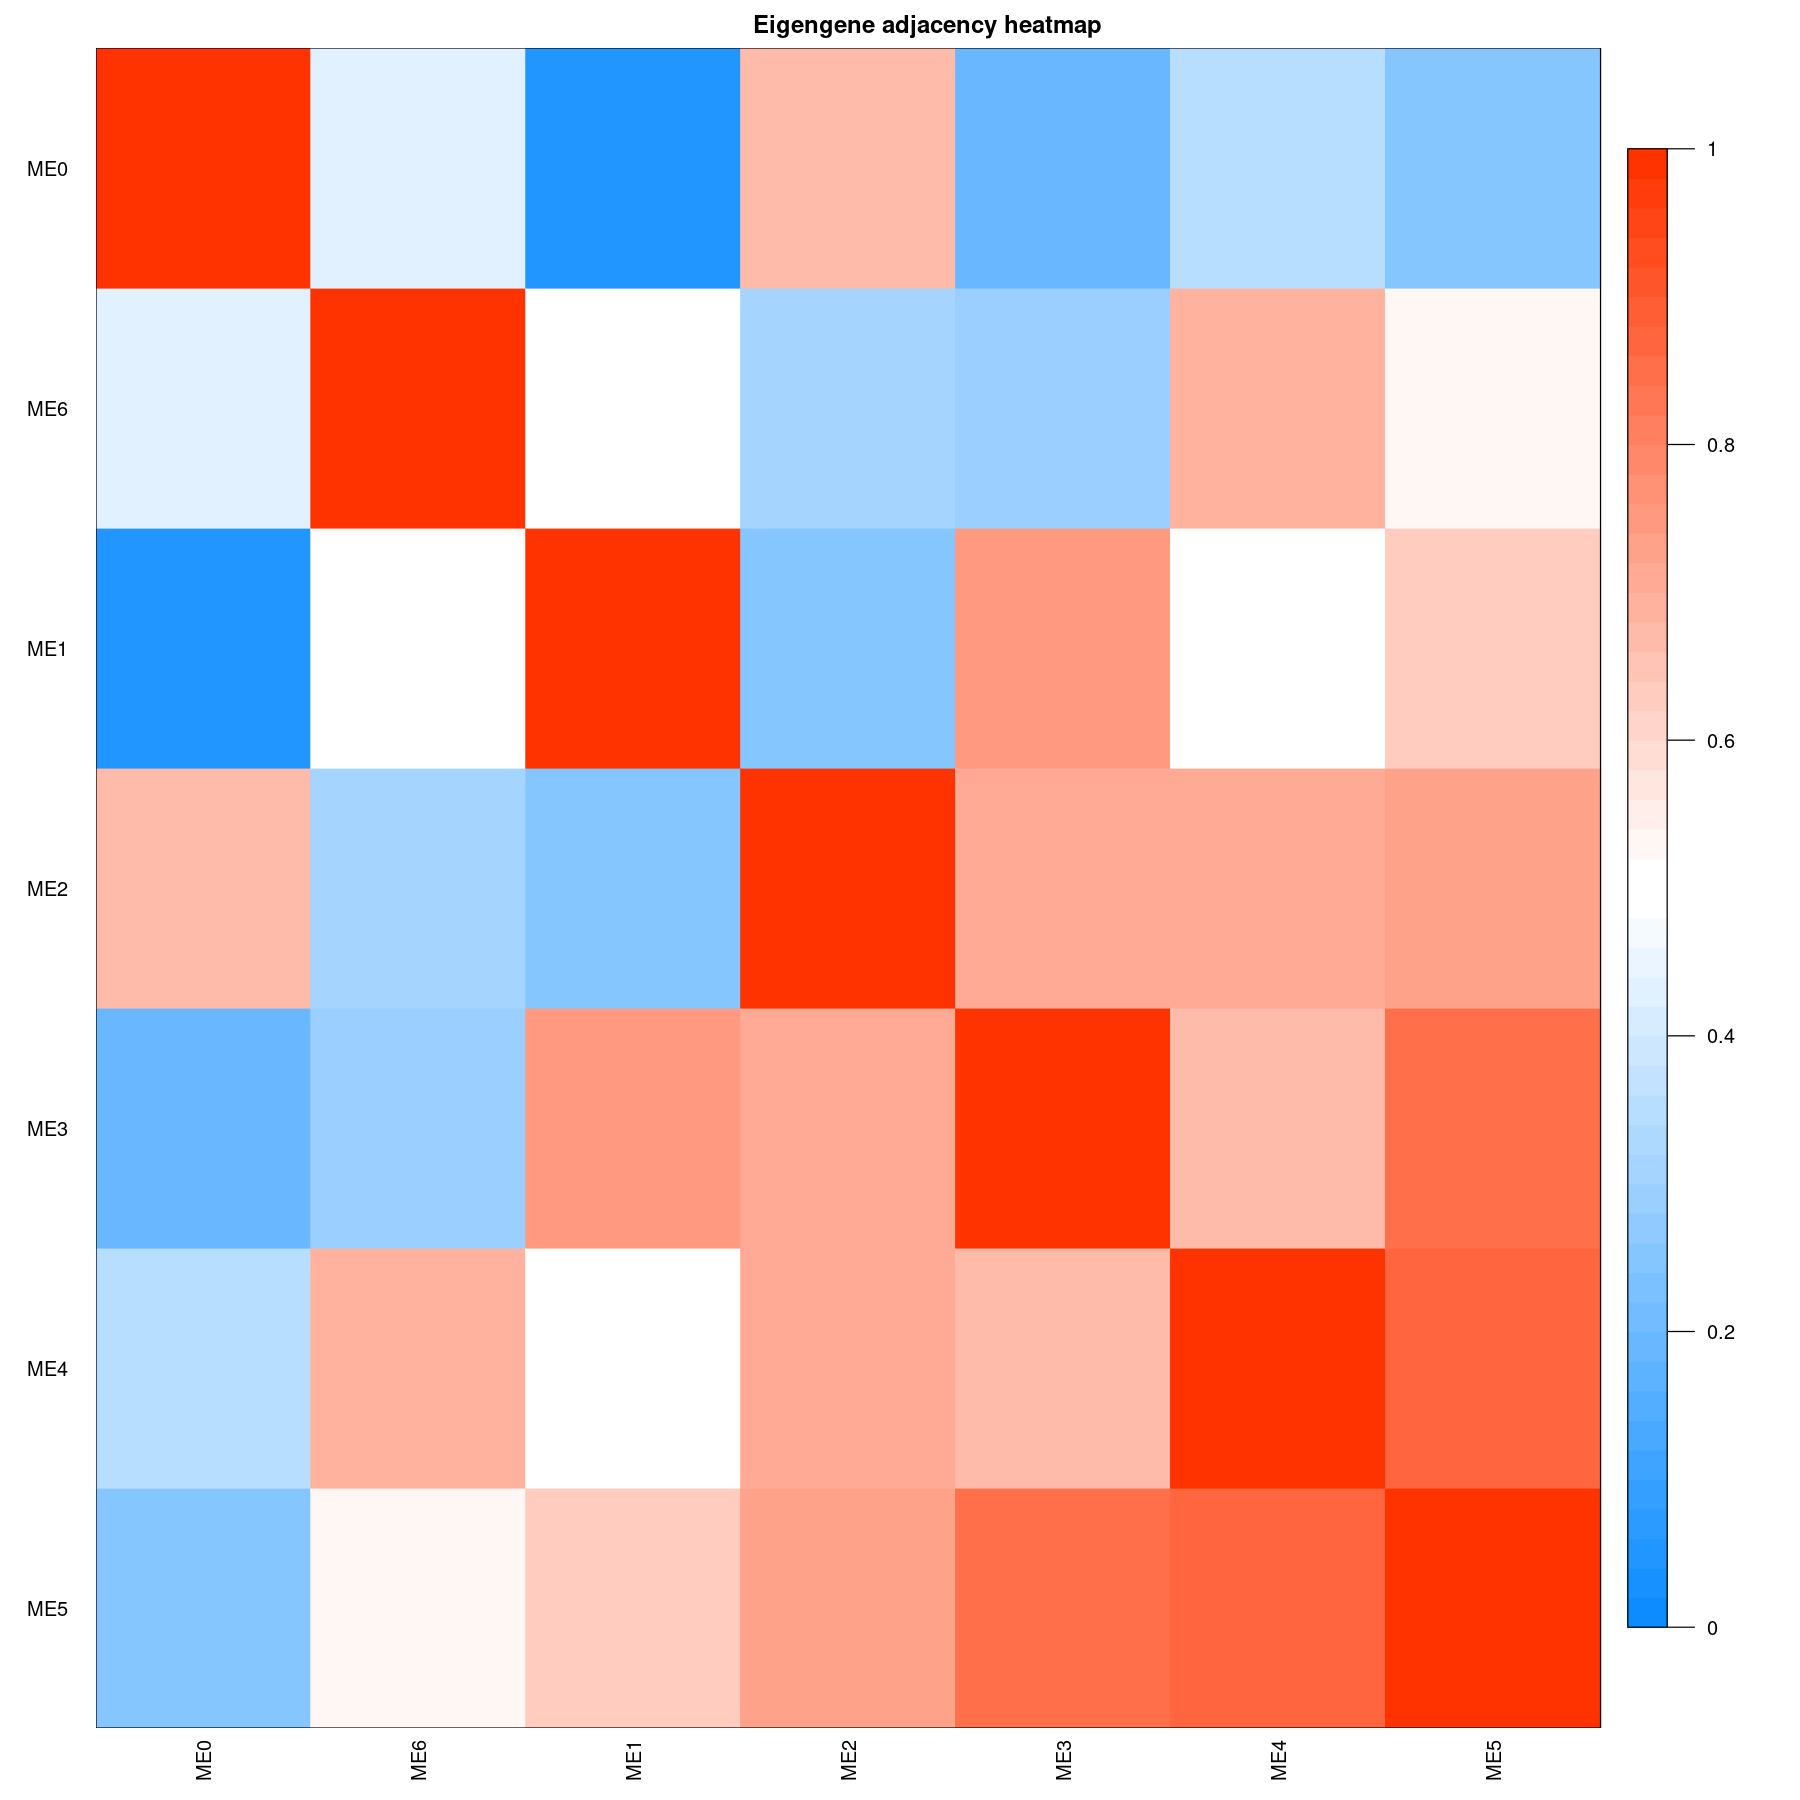

In [124]:
datExpr = expr_list$body
nGenes = ncol(datExpr)
nSamples = nrow(datExpr)

moduleColors = blockWise_power2_spearman$body$colors

# Recalculate module eigengenes
MEs = moduleEigengenes(datExpr, moduleColors)$eigengenes
# Add the weight to existing module eigengenes
MET = orderMEs(MEs)
# Plot the relationships among the eigengenes and the trait
#sizeGrWindow(5,7.5);
#par(cex = 0.9)

par(cex = 1.0)
plotEigengeneNetworks(MET, "Eigengene dendrogram", marDendro = c(0,4,2,0),
plotHeatmaps = FALSE)
# Plot the heatmap matrix (note: this plot will overwrite the dendrogram plot)
par(cex = 1.0)
plotEigengeneNetworks(MET, "Eigengene adjacency heatmap", marHeatmap = c(3,4,2,2),
plotDendrograms = FALSE, xLabelsAngle = 90)

In [125]:
dissTOM_list_bicor = llply(expr_list, function(datExpr) 1-TOMsimilarityFromExpr(datExpr,
                                                                                networkType = "signed", 
                                                                                power = 2, 
                                                                                corType = "bicor", ), 
                           .parallel = TRUE)

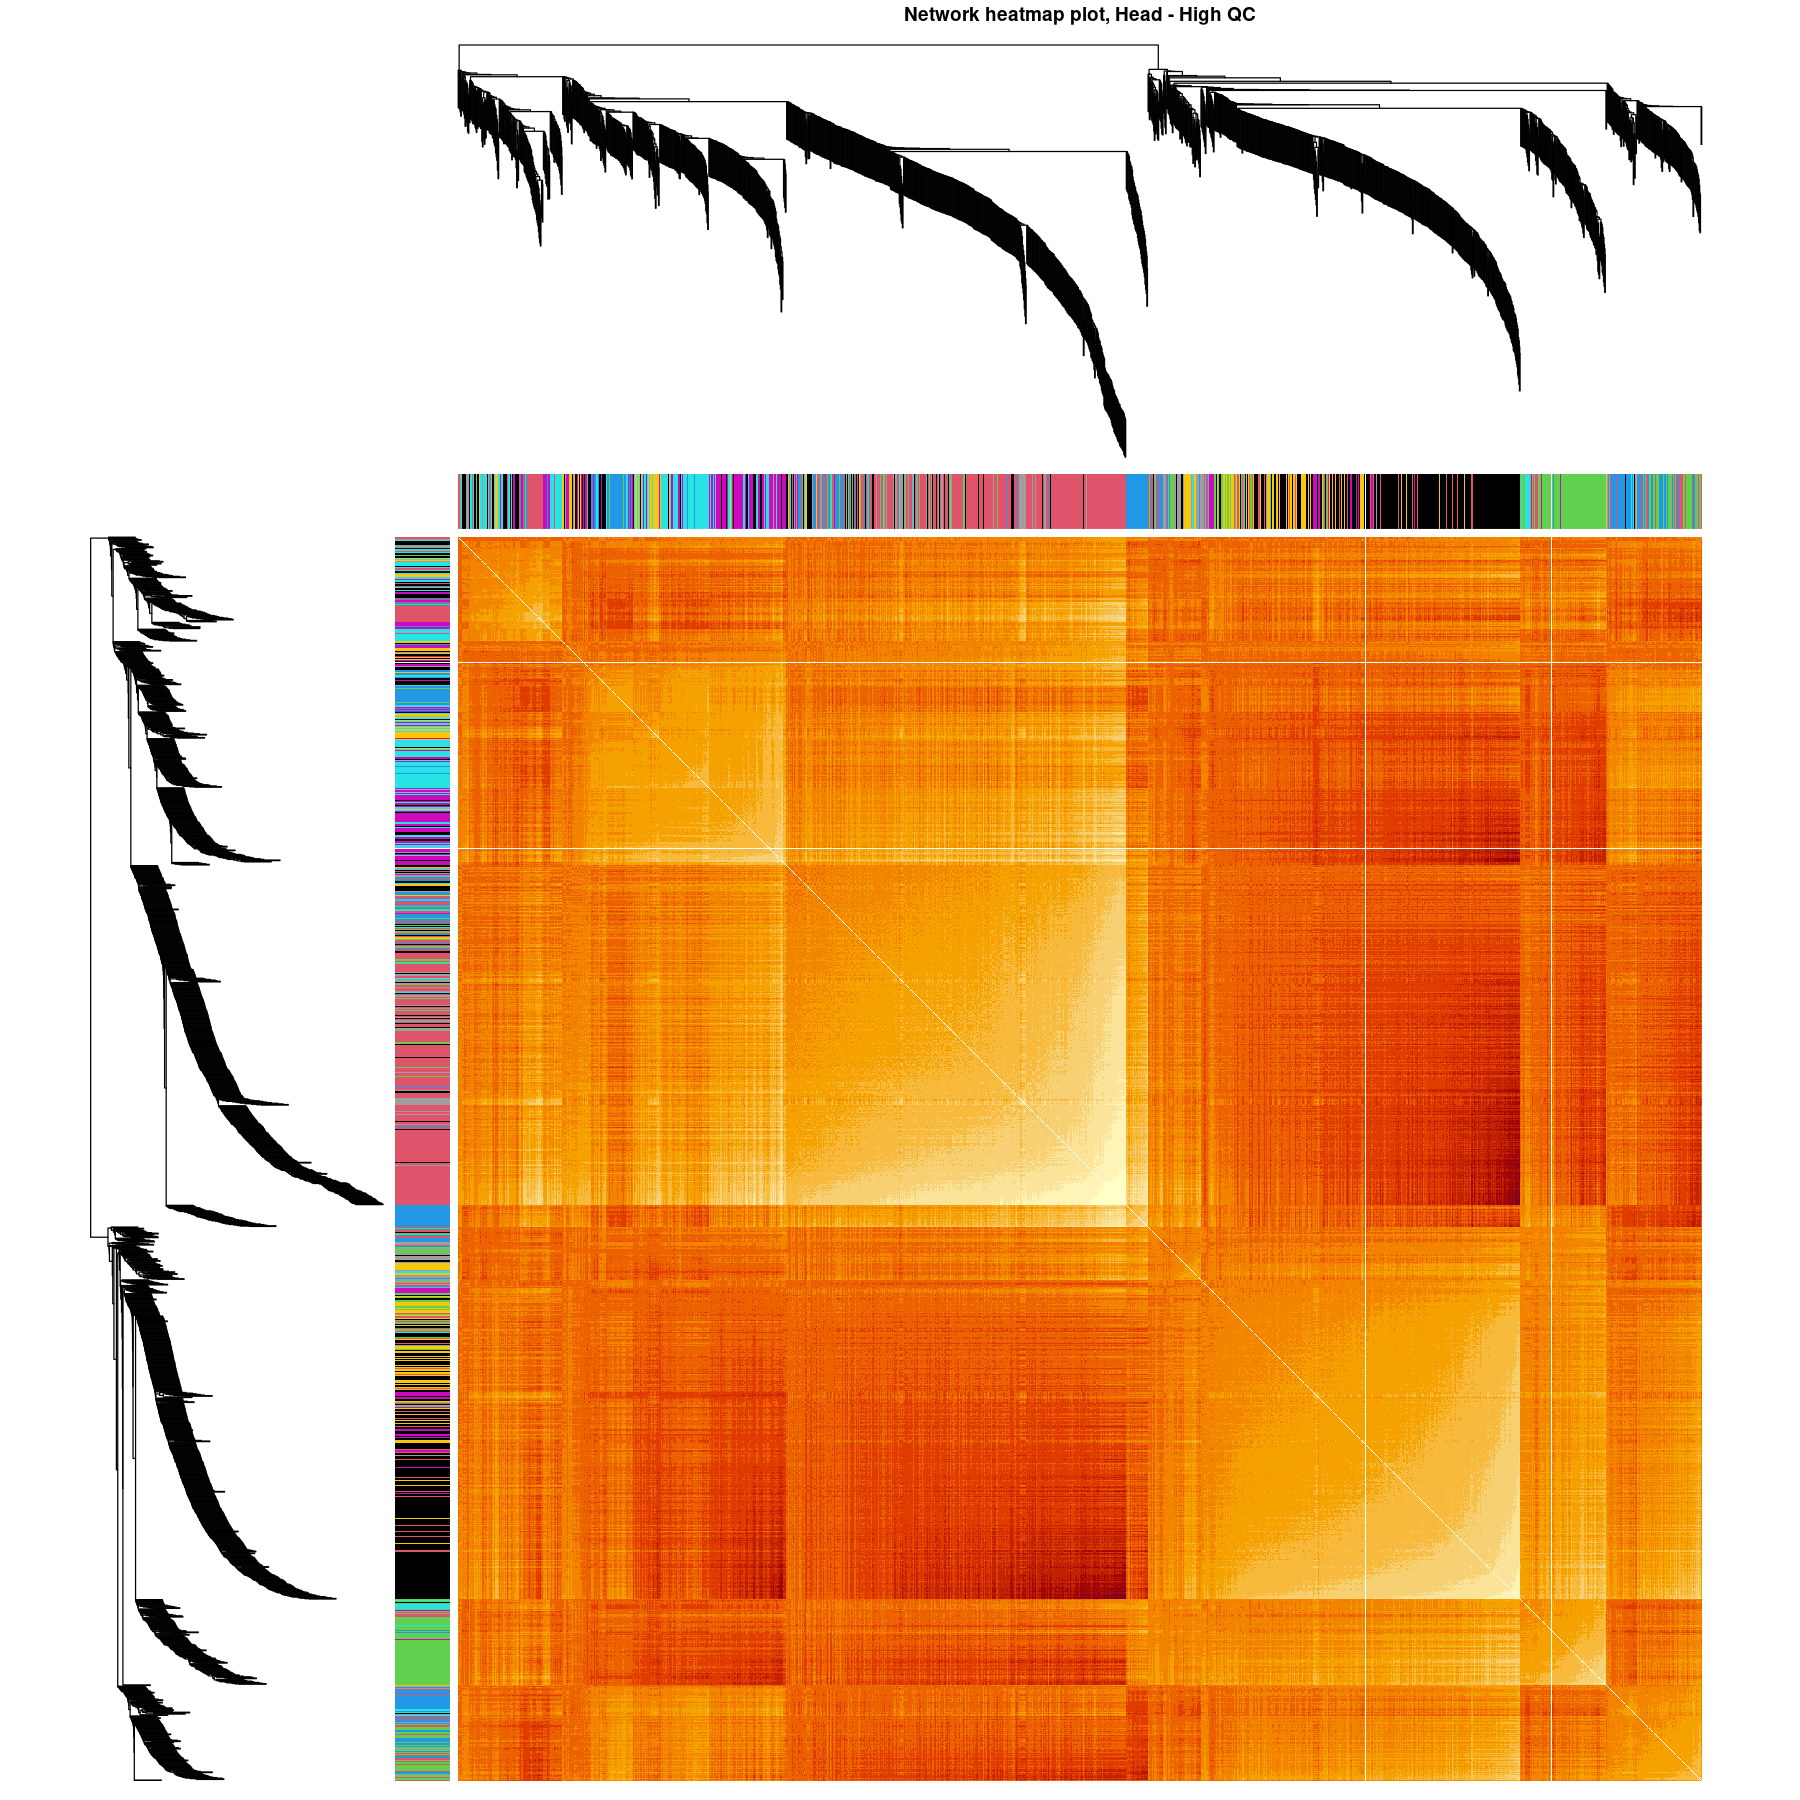

In [126]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "head"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list_bicor[[data_index]]

nSelect = 2000
select = sample(nGenes, size = nSelect);
moduleColors = blockWise_power2_spearman[[data_index]]$colors
select = sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Head - High QC")

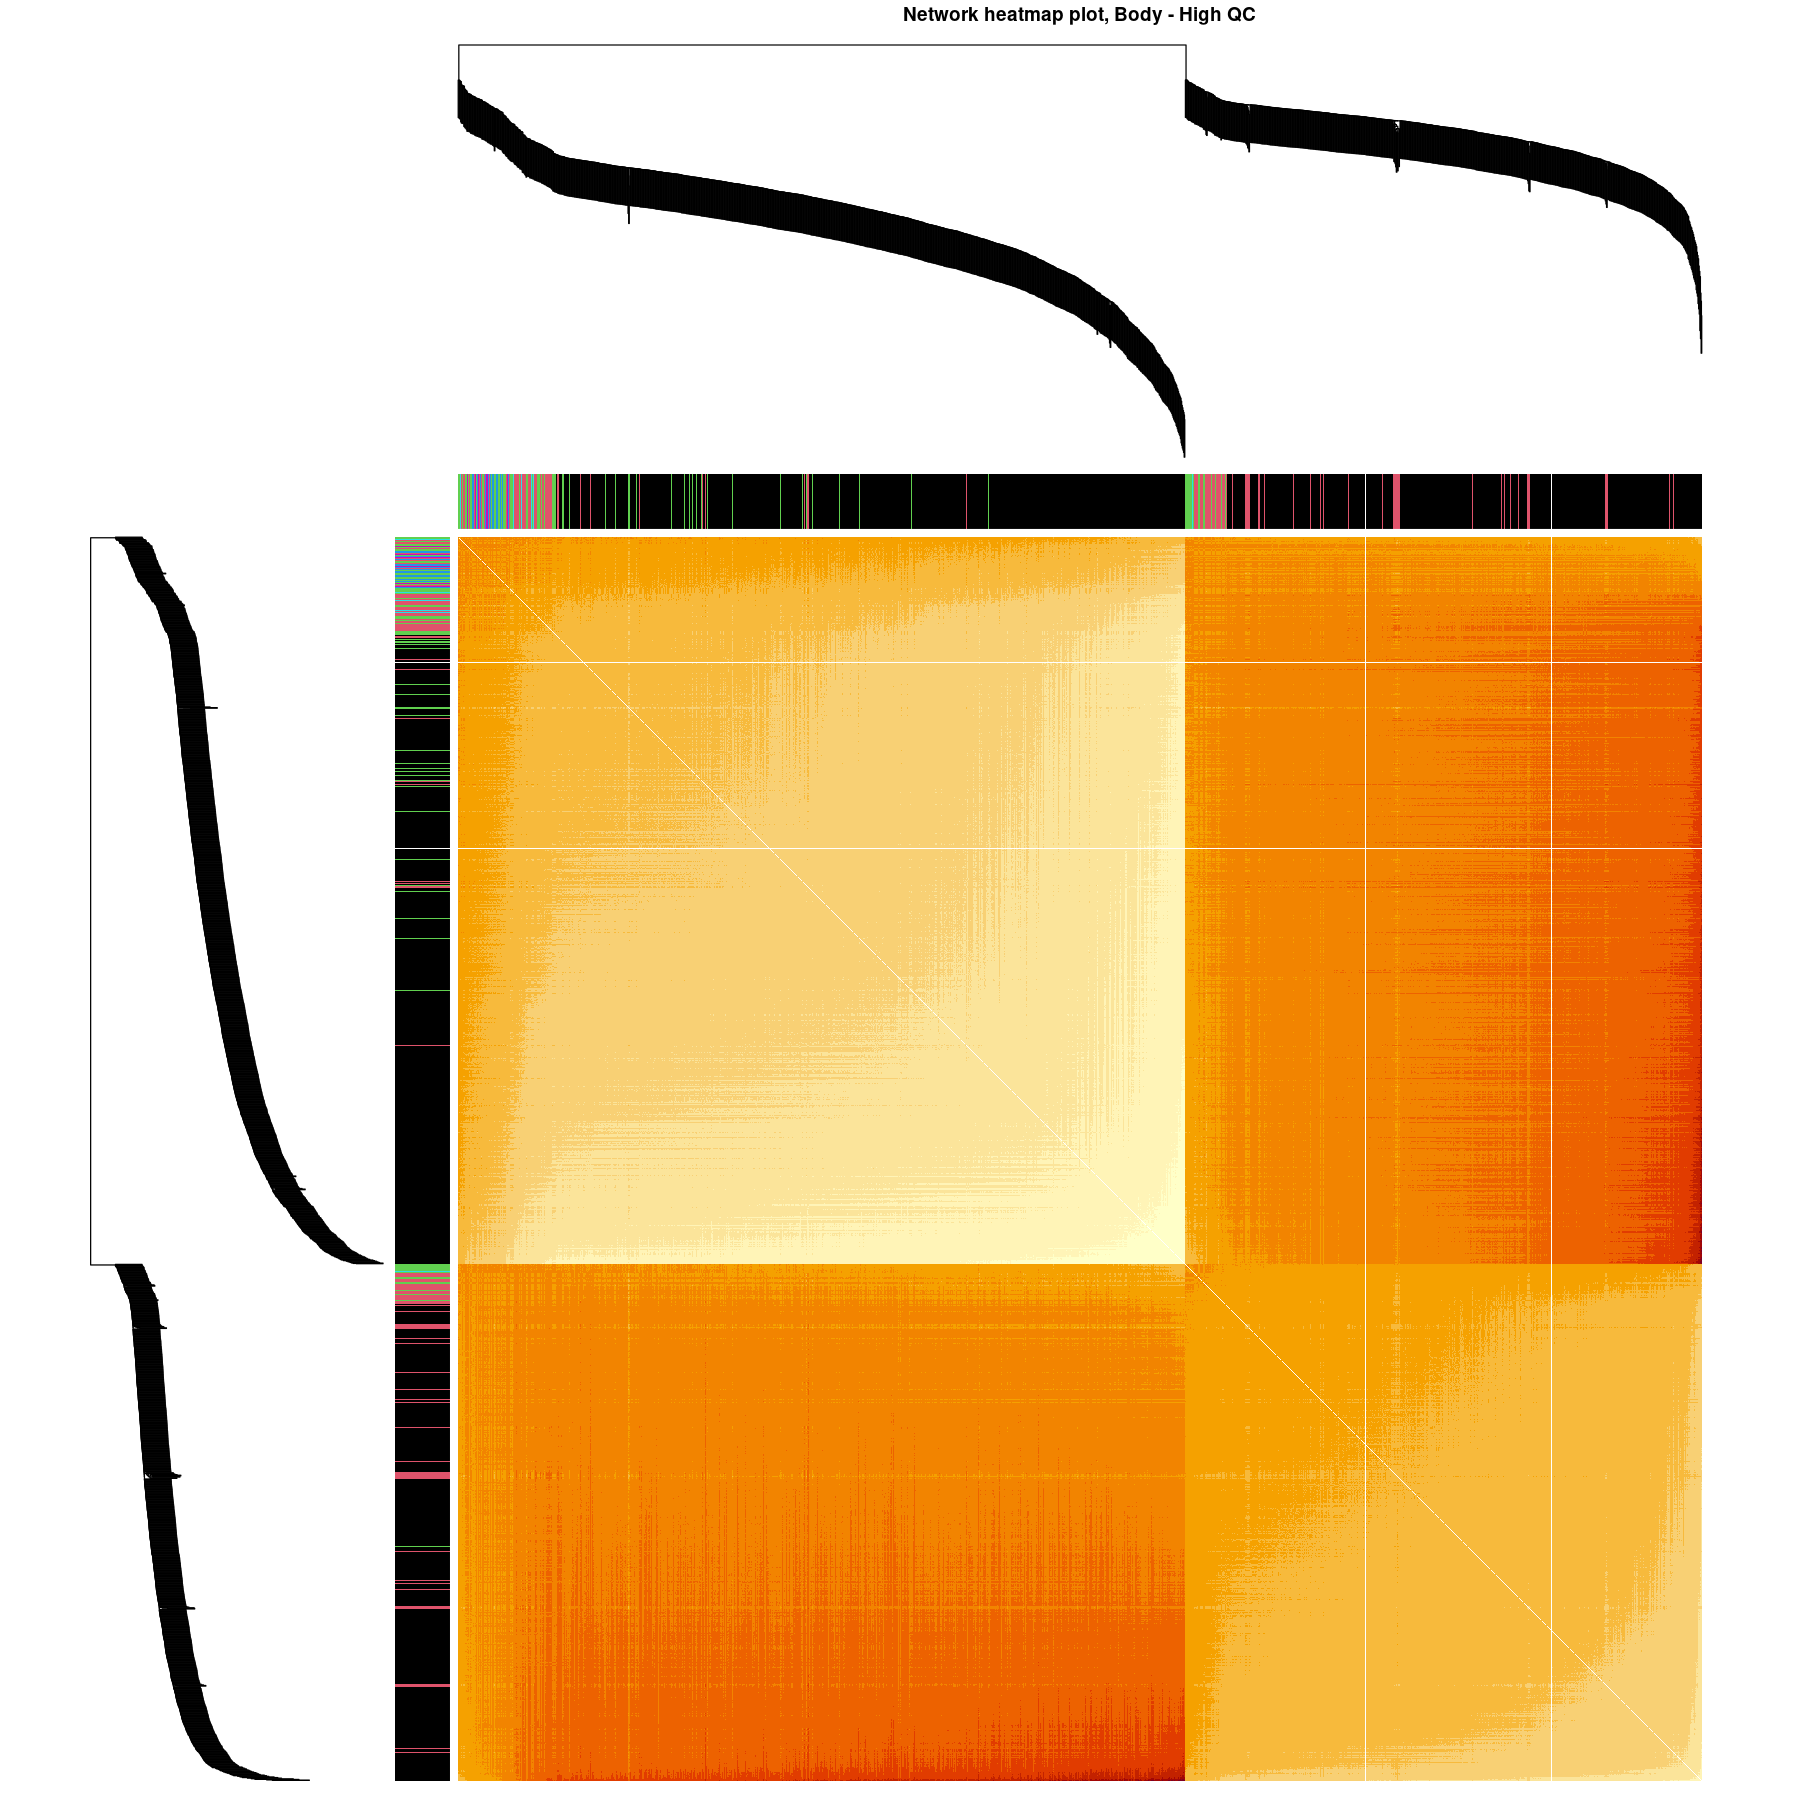

In [127]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "body"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list_bicor[[data_index]]

nSelect = 2000
select = sample(nGenes, size = nSelect);
moduleColors = blockWise_power2_spearman[[data_index]]$colors
select = sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Body - High QC")

In [129]:
getModules = function(label) {
    x = blockWise_power2_spearman[[label]]
    tissue =  str_split(label, "_")[[1]][1]
    data.frame(Gene = names(x$colors),
               WGCNA = x$colors,
               tissue = tissue)
    }
(WGCNA_modules = ldply(names(blockWise_power2_spearman), getModules))
write_csv(WGCNA_modules, file = "../data/WGCNA_modules_bodyHead_Control_fdr1e-5.csv")

Gene        WGCNA tissue
1    FBgn0031081  6    head  
2    FBgn0052350 12    head  
3    FBgn0024733  2    head  
4    FBgn0040372  0    head  
5    FBgn0023534  1    head  
6    FBgn0023537  2    head  
7    FBgn0000108  1    head  
8    FBgn0025640 19    head  
9    FBgn0003575  0    head  
10   FBgn0025634  0    head  
11   FBgn0025638  1    head  
12   FBgn0040383 11    head  
13   FBgn0040382  1    head  
14   FBgn0025621  0    head  
15   FBgn0015799  0    head  
16   FBgn0015288  2    head  
17   FBgn0002579  2    head  
18   FBgn0026879  2    head  
19   FBgn0029529  4    head  
20   FBgn0025633  0    head  
21   FBgn0040349  2    head  
22   FBgn0040364  0    head  
23   FBgn0024362  7    head  
24   FBgn0024364  6    head  
25   FBgn0024987  4    head  
26   FBgn0023169  0    head  
27   FBgn0052813  9    head  
28   FBgn0024985  0    head  
29   FBgn0027794  0    head  
30   FBgn0024986 17    head  
⋮    ⋮           ⋮     ⋮     
8271 FBgn0031420 0     body  
8272 FBgn0011818 1     body  
8273 FBgn0031418 1     body  
8274 FBgn0031417 1     body  
8275 FBgn0014010 1     body  
8276 FBgn0051681 0     body  
8277 FBgn0031406 0     body  
8278 FBgn0042186 1     body  
8279 FBgn0031381 1     body  
8280 FBgn0031384 0     body  
8281 FBgn0003557 1     body  
8282 FBgn0031392 1     body  
8283 FBgn0031398 0     body  
8284 FBgn0010288 6     body  
8285 FBgn0000097 1     body  
8286 FBgn0031390 0     body  
8287 FBgn0031389 1     body  
8288 FBgn0031377 1     body  
8289 FBgn0031360 1     body  
8290 FBgn0027597 0     body  
8291 FBgn0000579 2     body  
8292 FBgn0021906 1     body  
8293 FBgn0053126 1     body  
8294 FBgn0040723 1     body  
8295 FBgn0031320 0     body  
8296 FBgn0031313 1     body  
8297 FBgn0031309 0     body  
8298 FBgn0031305 1     body  
8299 FBgn0016926 3     body  
8300 FBgn0003310 1     body

In [130]:
Head_hsbm = read_csv("../data/output/SBM/clustering/head_weights-spearman_fdr-1e-05_mcmc_mode_hierarchical-SBM.csv")
Head_hsbm$X1 = NULL
Head_hsbm$tissue = "head"

body_hsbm = read_csv("../data/output/SBM/clustering/body_weights-spearman_fdr-1e-05_mcmc_mode_hierarchical-SBM.csv")
body_hsbm$X1 = NULL
body_hsbm$tissue = "body"
hsbm = rbind(body_hsbm, Head_hsbm)

WGCNA_HSBM = full_join(WGCNA_modules, hsbm, by = c("Gene", "tissue"))

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Gene = col_character(),
  Degree = col_double(),
  E_corr = col_double(),
  B1 = col_double(),
  B2 = col_double(),
  B3 = col_double(),
  B4 = col_double(),
  B5 = col_double(),
  B6 = col_double(),
  B7 = col_double()
)




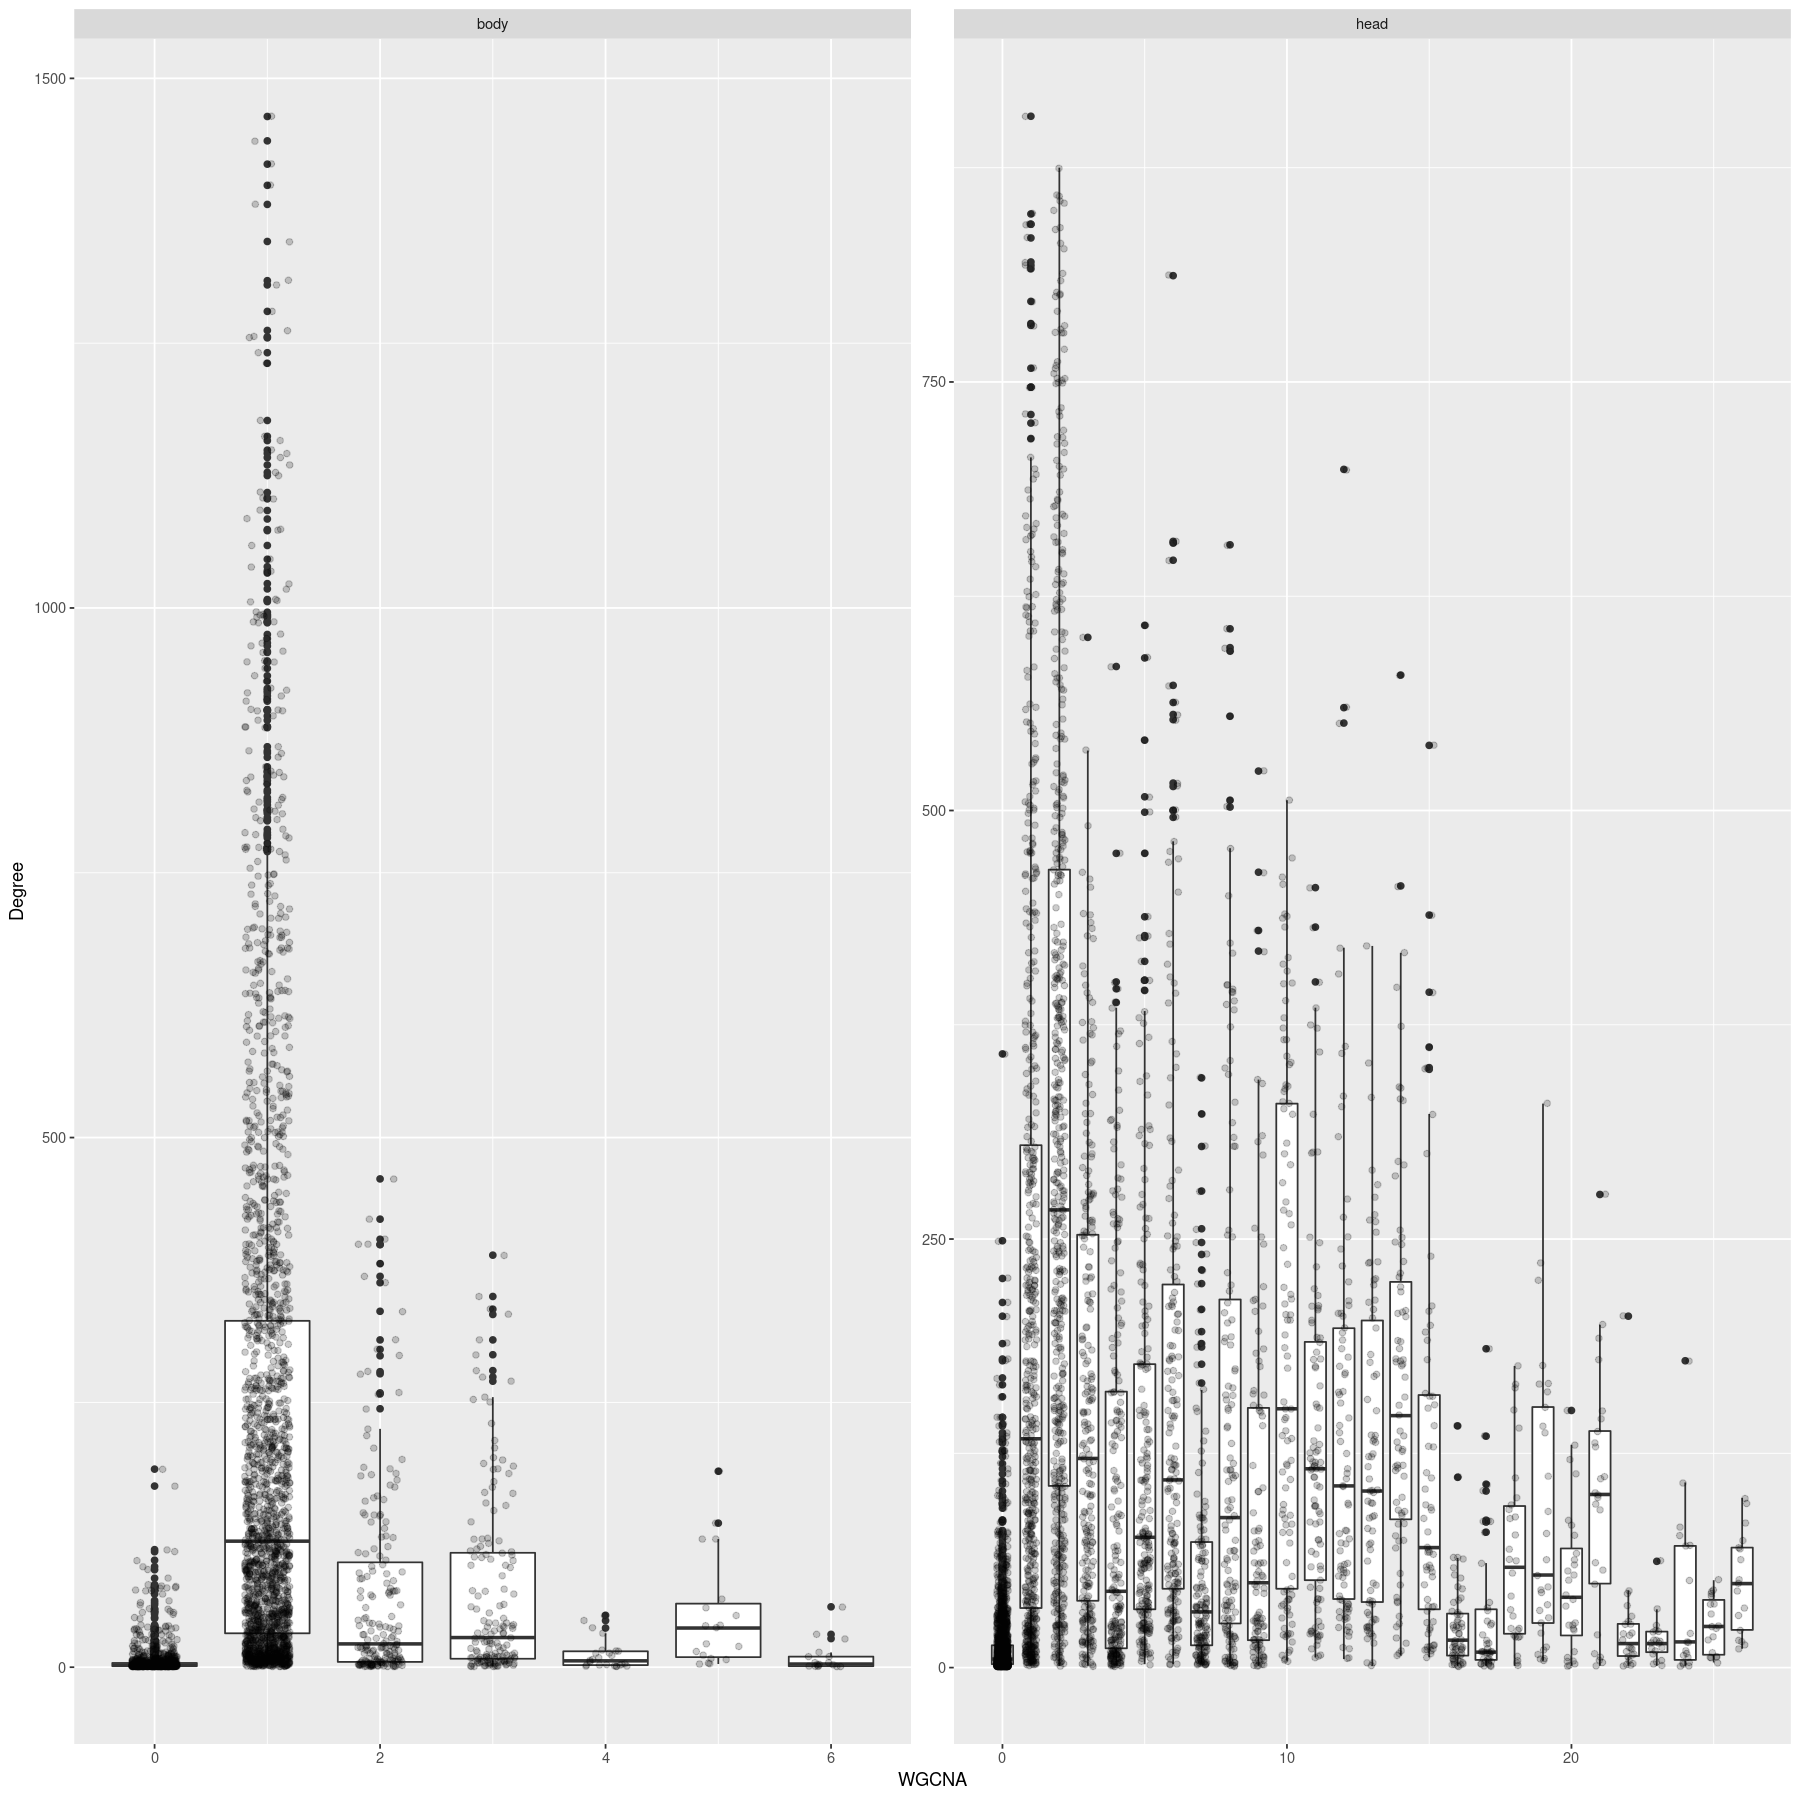

In [134]:
WGCNA_HSBM %>%
    ggplot(aes(WGCNA, Degree)) + 
    geom_boxplot(aes(group = WGCNA)) +
    geom_jitter(alpha = 0.2, width = 0.2) + 
    facet_wrap(~tissue, scales = "free")

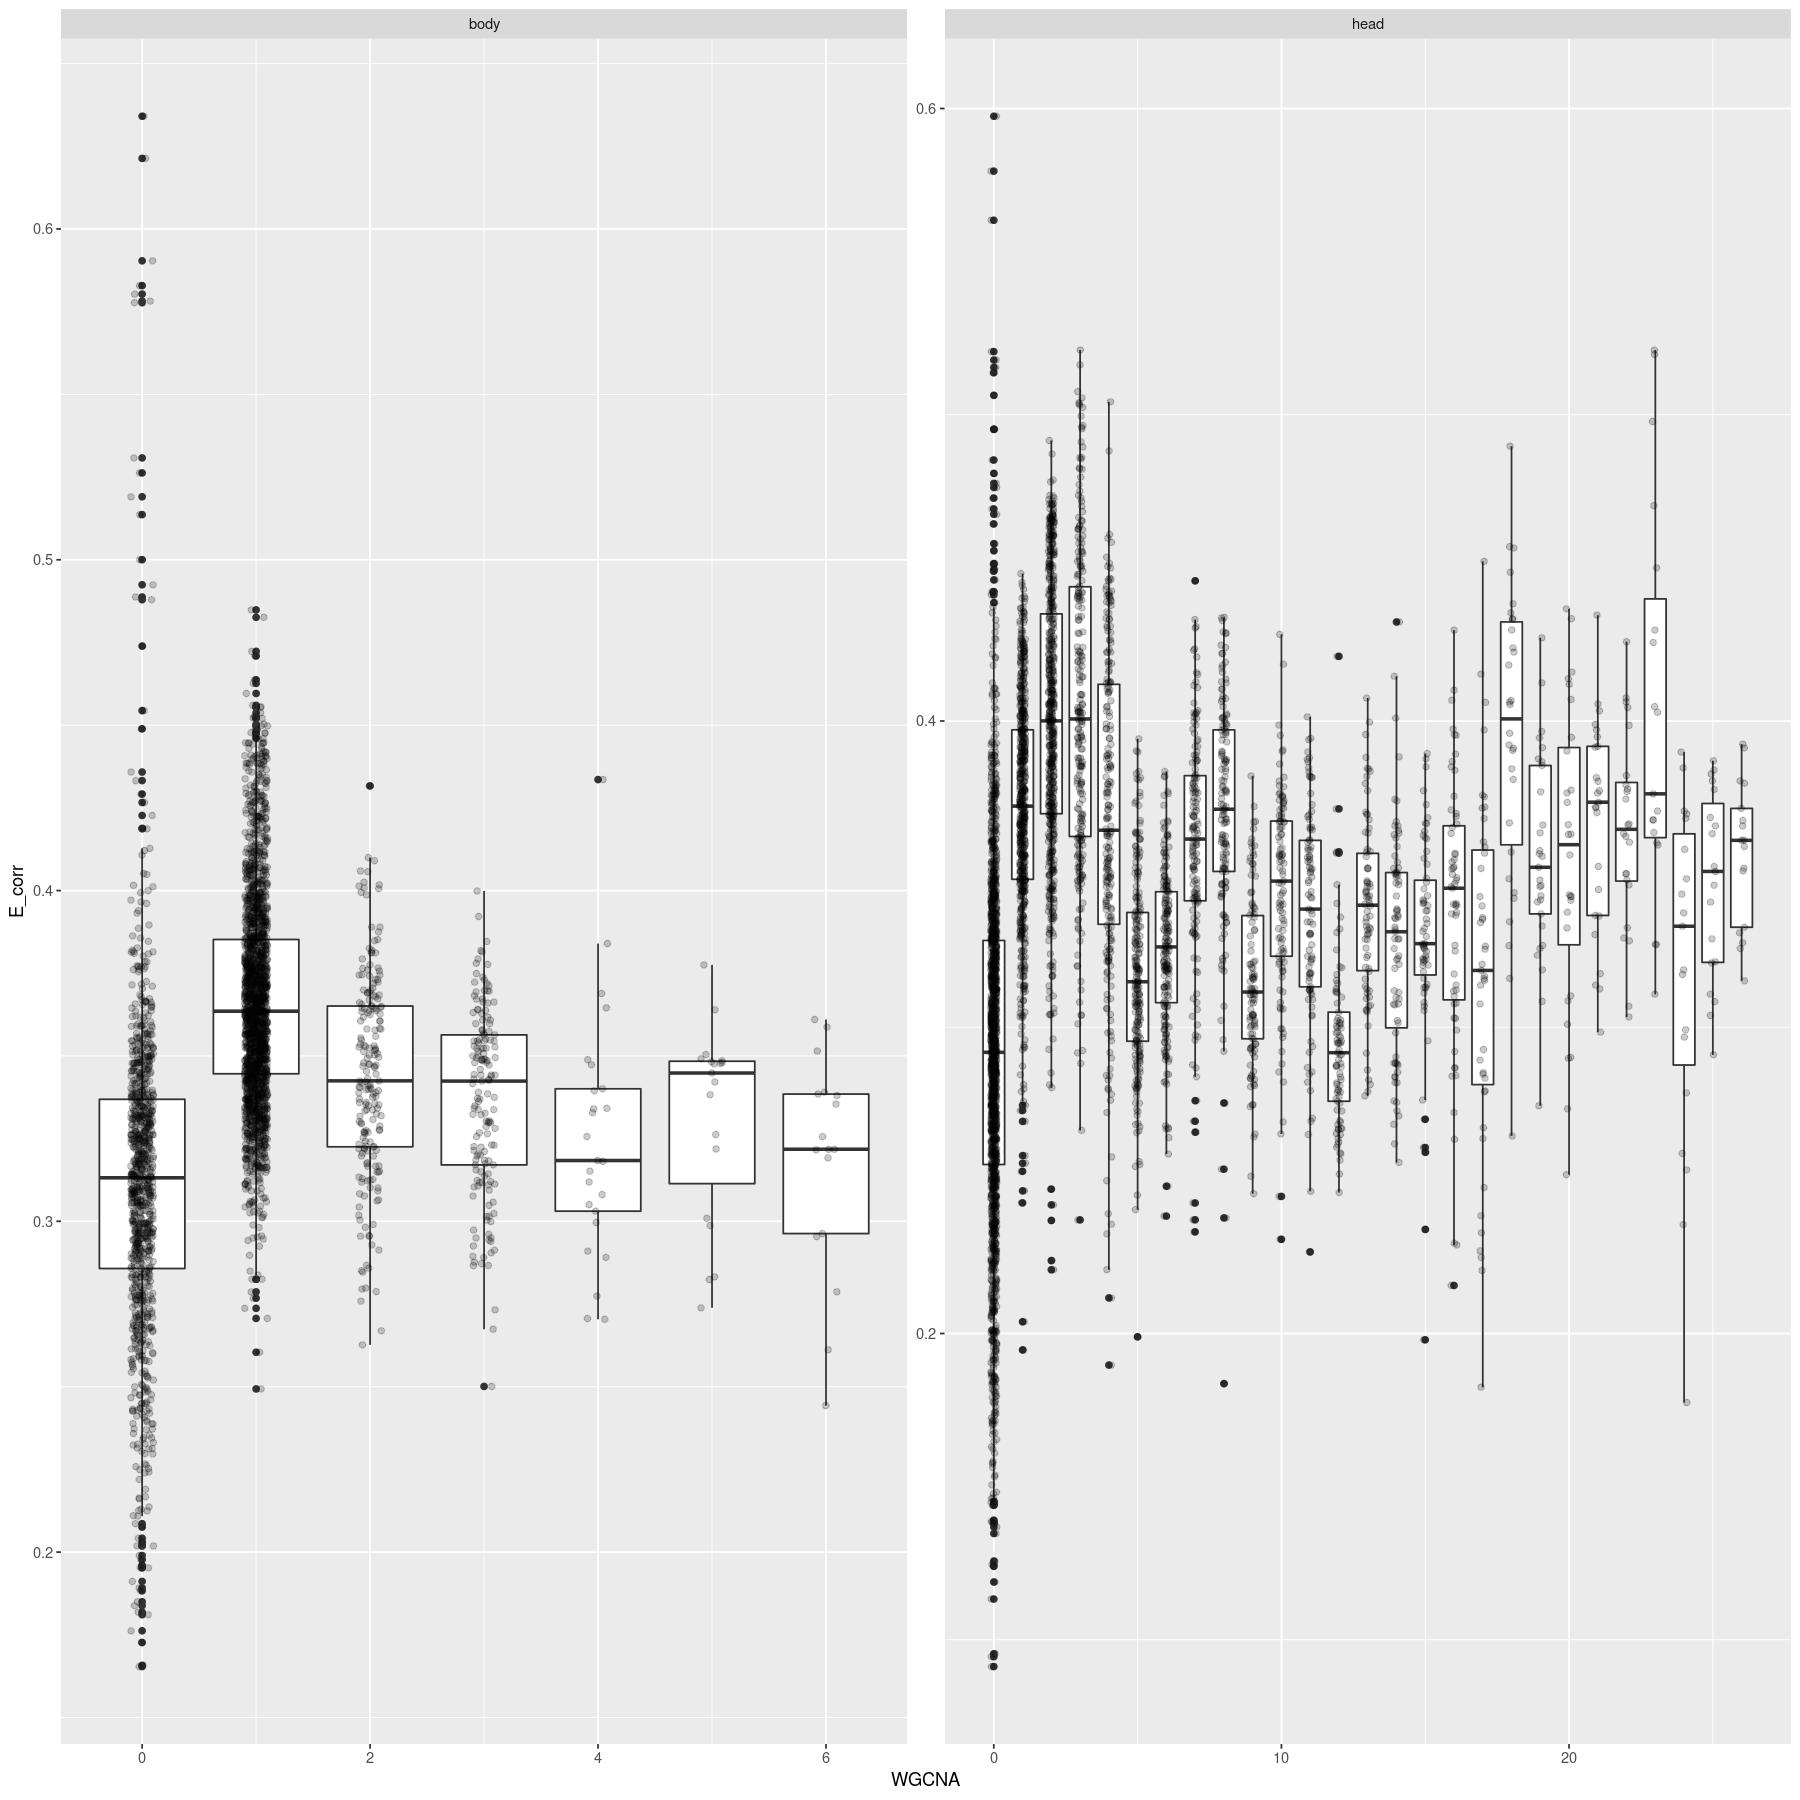

In [135]:
WGCNA_HSBM %>%
    ggplot(aes(WGCNA, E_corr)) + 
    geom_boxplot(aes(group = WGCNA)) +
    geom_jitter(alpha = 0.2, width = 0.1) + 
    facet_wrap(~tissue, scales = "free")

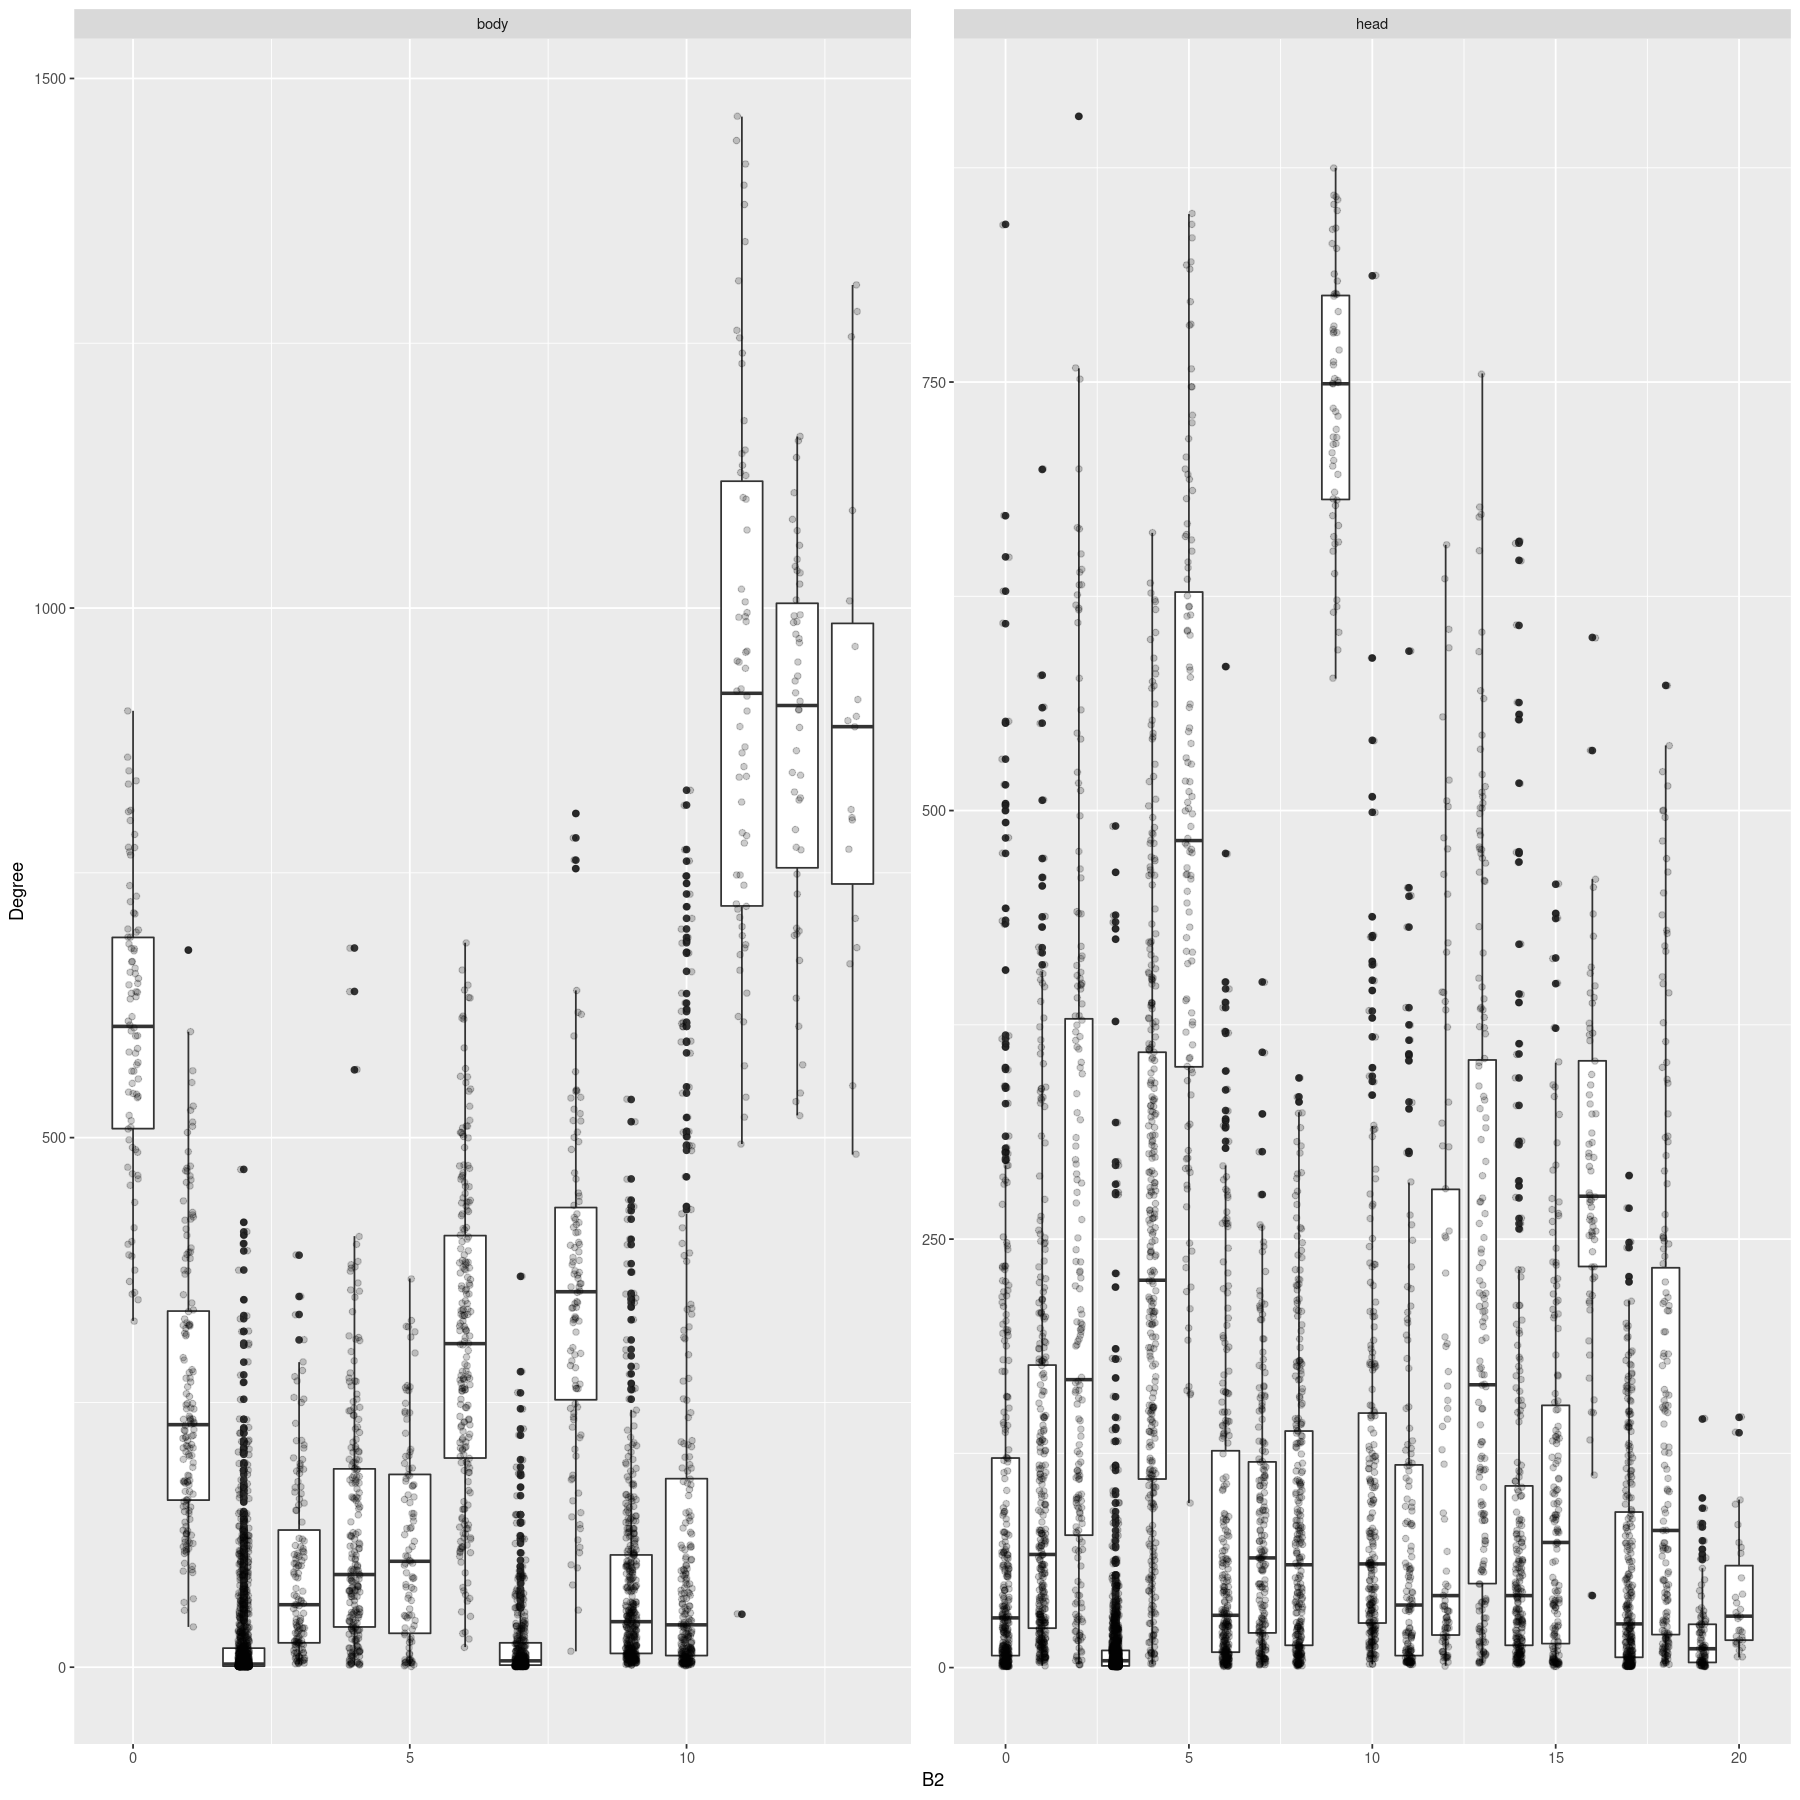

In [136]:
WGCNA_HSBM %>%
    ggplot(aes(B2, Degree)) + 
    geom_boxplot(aes(group = B2)) +
    geom_jitter(alpha = 0.2, width = 0.1) + 
    facet_wrap(~tissue, scales = "free")

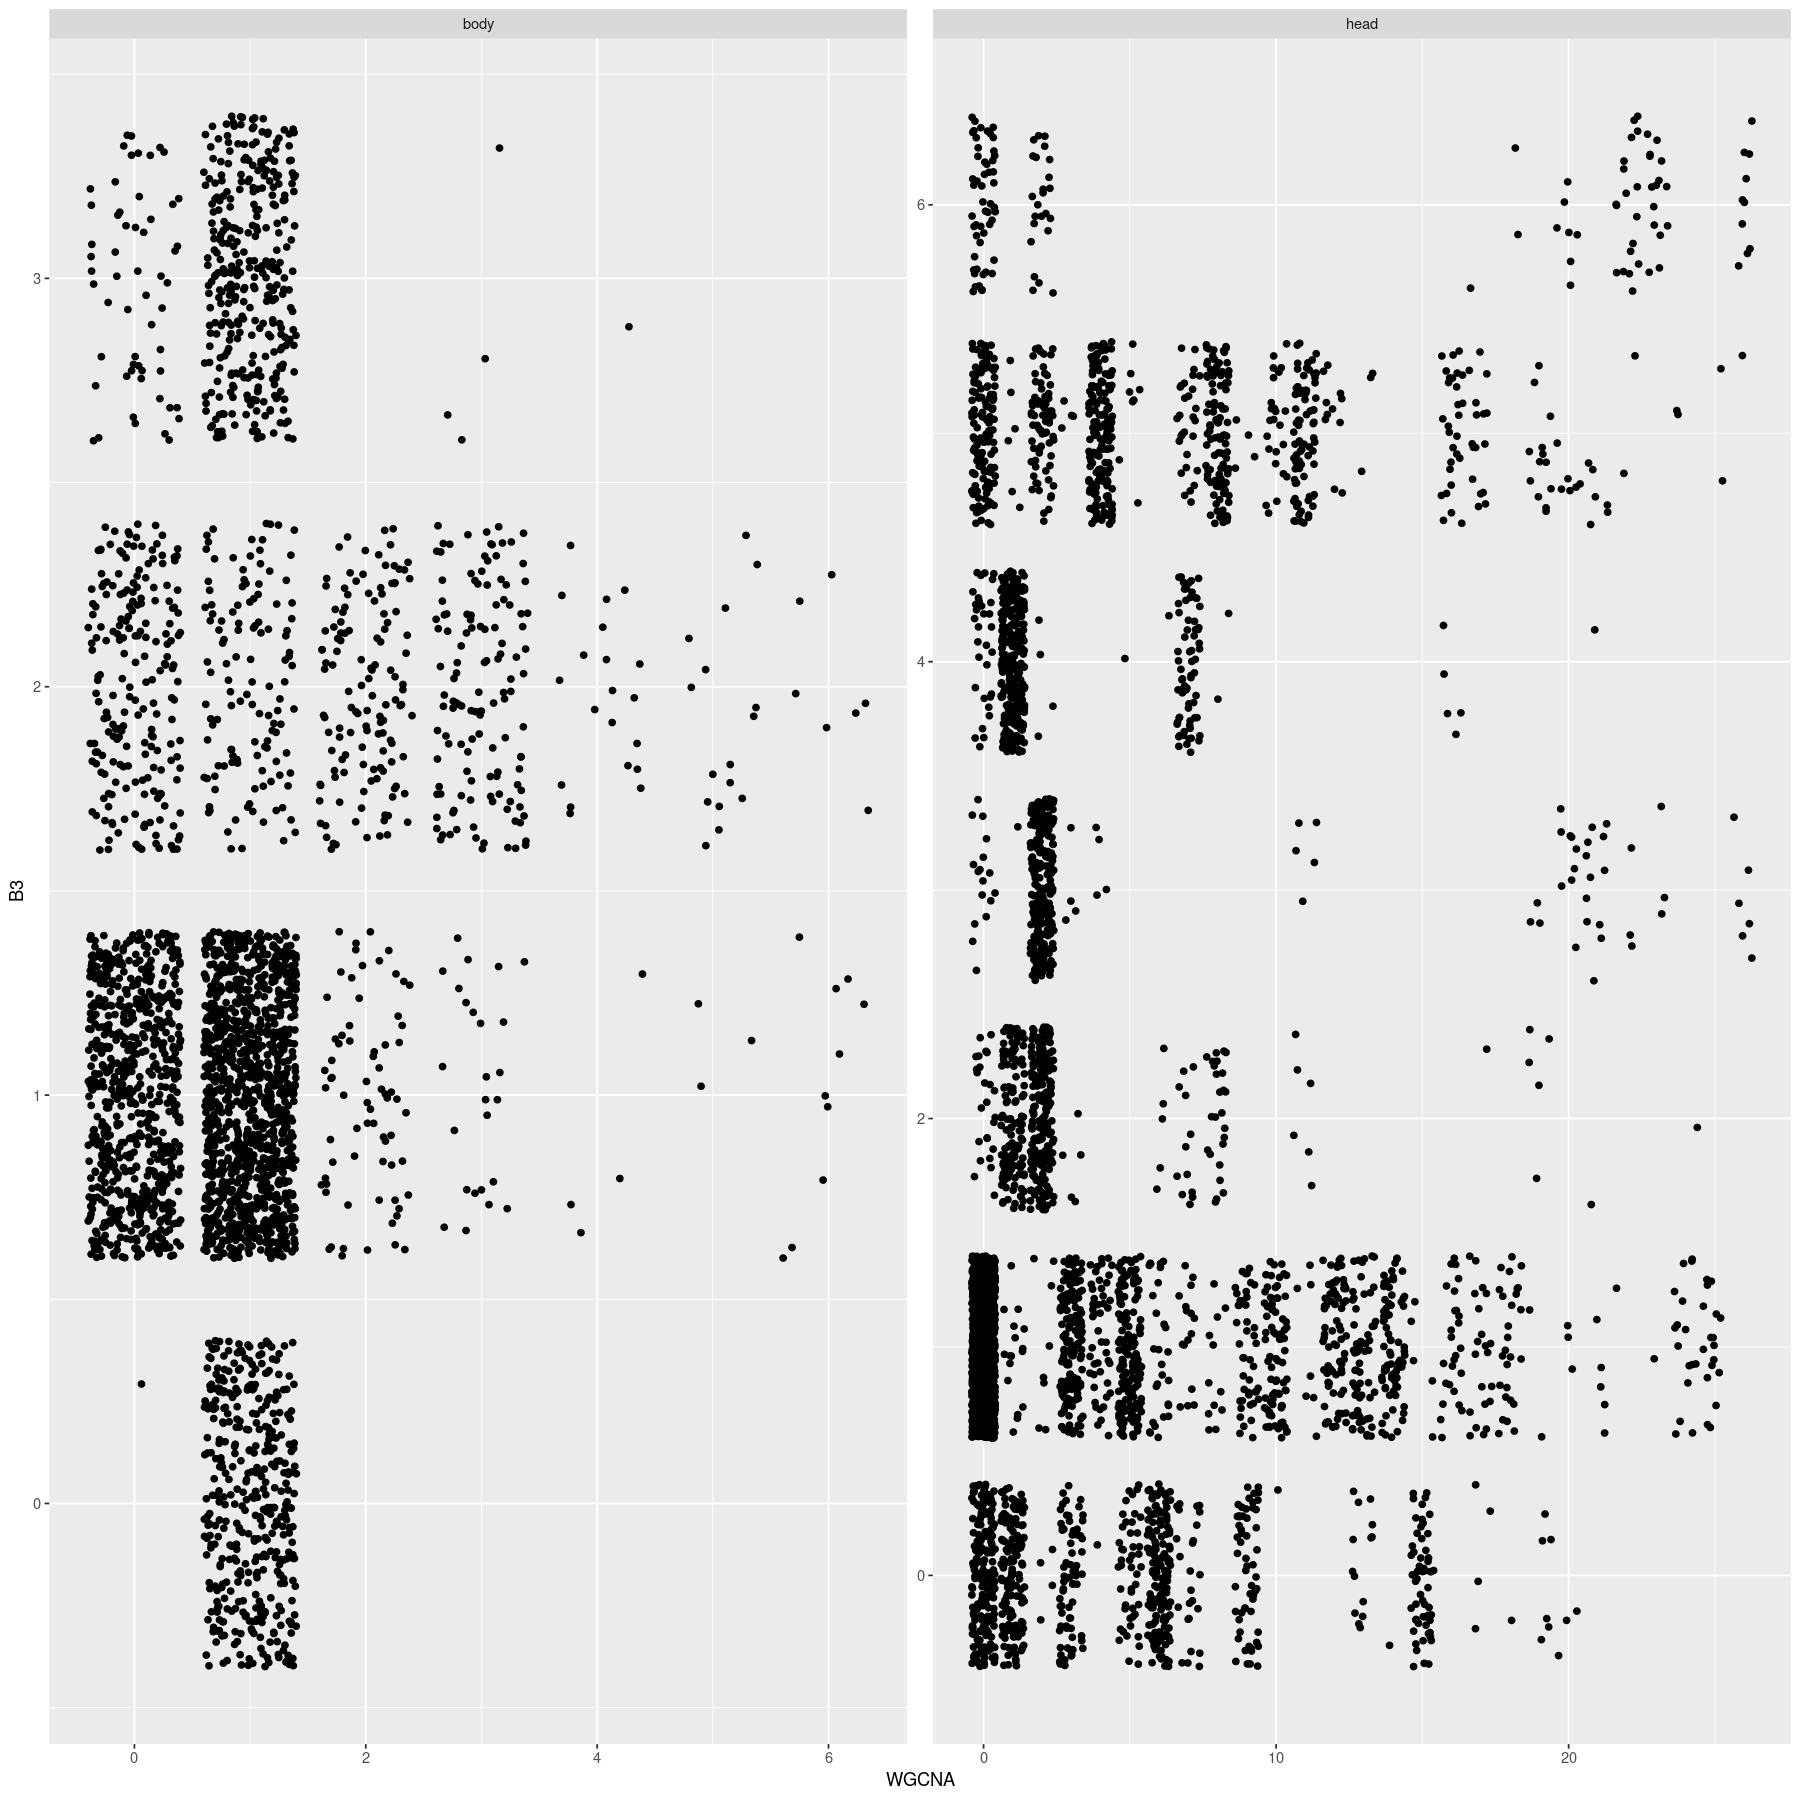

In [142]:
WGCNA_HSBM %>%
    ggplot(aes(WGCNA, B3)) + 
    geom_jitter() + facet_wrap(~tissue, scales = "free")

In [138]:
WGCNA_HSBM %>%
    group_by(tissue, B2) %>%
    count()

tissue B2 n   
1  body    0   86
2  body    1  152
3  body    2 1162
4  body    3  139
5  body    4  220
6  body    5  101
7  body    6  210
8  body    7  390
9  body    8  110
10 body    9  417
11 body   10  285
12 body   11   66
13 body   12   50
14 body   13   19
15 head    0  348
16 head    1  332
17 head    2  184
18 head    3 1050
19 head    4  321
20 head    5  116
21 head    6  280
22 head    7  198
23 head    8  285
24 head    9   59
25 head   10  242
26 head   11  156
27 head   12   93
28 head   13  170
29 head   14  236
30 head   15  167
31 head   16   69
32 head   17  290
33 head   18  166
34 head   19  100
35 head   20   31

In [139]:
WGCNA_HSBM %>%
    group_by(tissue, WGCNA) %>%
    count()

tissue WGCNA n   
1  body    0     980
2  body    1    2010
3  body    2     199
4  body    3     157
5  body    4      25
6  body    5      19
7  body    6      17
8  head    0    1640
9  head    1     600
10 head    2     564
11 head    3     243
12 head    4     222
13 head    5     221
14 head    6     190
15 head    7     152
16 head    8     140
17 head    9     106
18 head   10     105
19 head   11      97
20 head   12      85
21 head   13      78
22 head   14      75
23 head   15      63
24 head   16      59
25 head   17      43
26 head   18      30
27 head   19      29
28 head   20      28
29 head   21      25
30 head   22      24
31 head   23      19
32 head   24      19
33 head   25      19
34 head   26      17

In [162]:
for(t in unique(WGCNA_HSBM$tissue)){
    out_dir = paste0("../data/output/SBM/clustering/", t, "_weights-spearman_fdr-1e-05_mcmc_mode_hierarchical-SBM_gene-blocks/WGCNA")
    if(dir.exists(out_dir)) {
        for(i in dir(out_dir, full.names = TRUE))
            file.remove(i)
    } else 
        dir.create(out_dir, recursive = T)
    WGCNA_HSBM_t = WGCNA_HSBM %>% filter(tissue == t)
    for(block in unique(WGCNA_HSBM_t$WGCNA)){
        WGCNA_HSBM_t %>%
            filter(WGCNA == block) %>%
            select(Gene) %>% 
            write_csv(file.path(out_dir, paste0("wgcna_", block, ".csv")), col_names = FALSE)     
    }
}
    

[1] "__pycache__"                                                                     
 [2] "body_high-block.1.RData"                                                         
 [3] "body_low-block.1.RData"                                                          
 [4] "body_table_wcgna_fdrLevel-1e-05.csv"                                             
 [5] "body_trimmed-block.1.RData"                                                      
 [6] "body-block.1.RData"                                                              
 [7] "Control-BodyHead - NetworkStats.ipynb"                                           
 [8] "Correlations between head and body - The SVA trials.ipynb"                       
 [9] "datafile.txt"                                                                    
[10] "Decoherence for the masses.ipynb"                                                
[11] "export_blocks.py"                                                                
[12] "FETCH_HEAD"                                                                      
[13] "fit_sbm.py"                                                                      
[14] "gene_network_statistics_test.csv"                                                
[15] "Graph Tool - Control-Body-HighQC - Graph Structure .ipynb"                       
[16] "Graph tool network inference.ipynb"                                              
[17] "Graph Tool Small network Resource Paper - Control-BodyHead - Make Networks.ipynb"
[18] "GraphTool-Control-Head-HighQC-NullModels.ipynb"                                  
[19] "GraphTool-ResourcePaper-Control-Body-HighQC.ipynb"                               
[20] "GraphTool-ResourcePaper-Control-Head-HighQC.ipynb"                               
[21] "head_high-block.1.RData"                                                         
[22] "head_low-block.1.RData"                                                          
[23] "head_table_wcgna_fdrLevel-1e-05.csv"                                             
[24] "head_trimmed-block.1.RData"                                                      
[25] "head-block.1.RData"                                                              
[26] "make_network.py"                                                                 
[27] "run_inital_sbm_head.sh"                                                          
[28] "run_initial_sbm_body.sh"                                                         
[29] "run_sbm_body.sh"                                                                 
[30] "run_sbm_head.sh"                                                                 
[31] "test.csv"                                                                        
[32] "trim_networks.py"                                                                
[33] "WGCNA last chance-Copy1.ipynb"                                                   
[34] "WGCNA last chance.ipynb"                                                         
[35] "wgcna_body_0.csv"                                                                
[36] "wgcna_body_1.csv"                                                                
[37] "wgcna_body_10.csv"                                                               
[38] "wgcna_body_11.csv"                                                               
[39] "wgcna_body_12.csv"                                                               
[40] "wgcna_body_13.csv"                                                               
[41] "wgcna_body_14.csv"                                                               
[42] "wgcna_body_15.csv"                                                               
[43] "wgcna_body_16.csv"                                                               
[44] "wgcna_body_17.csv"                                                               
[45] "wgcna_body_18.csv"                                                               
[46] "wgcna_body_19.csv"                 